In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pylab as plt

In [41]:
1/7.733952e2*100*1e5

12930.000082752

In [ ]:
import math

In [83]:
h_arr = [0, 4e5, 10e5, 40e5, 100e5]
a_arr = [-186.555305, -94.919, 0.61289, 0.0, 0.001128292]
b_arr = [1222.6562, 1144.9069, 1305.5948, 540.1778, 1]
c_arr = [994186.38, 878153.55, 636143.04, 772170.16, 10e9]

def xatm(h):
    if h < h_arr[1]:
        ii = 0
        return a_arr[ii] + b_arr[ii] * math.exp(-h/c_arr[ii])
    elif h < h_arr[2]:
        ii = 1
        return a_arr[ii] + b_arr[ii] * math.exp(-h/c_arr[ii])
    elif h < h_arr[3]:
        ii = 2
        return a_arr[ii] + b_arr[ii] * math.exp(-h/c_arr[ii])
    elif h < h_arr[4]:
        ii = 3
        return a_arr[ii] + b_arr[ii] * math.exp(-h/c_arr[ii])
    else:
        ii = 4
        return a_arr[ii] - b_arr[ii] * (h/c_arr[ii])
        

a5 = 1.00892857e+03, c5 = 1.12000000e+04
rho = 8.92857143e-05, a=9.91071429e+02, b=2.42703735e+01, c=1.00000000e+05, h0=1.00000000e+05


(0.0, 300000.0)

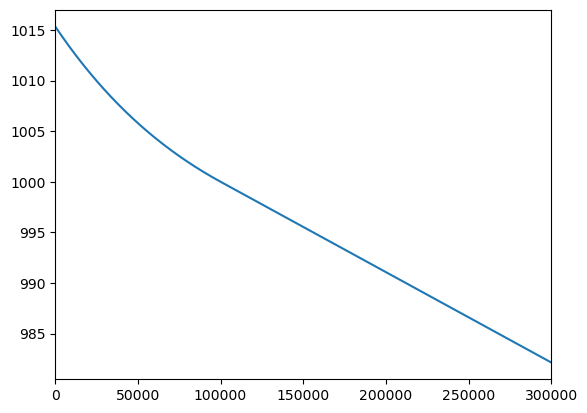

In [115]:
import math
x_at_h0 = 1000
htop = 113e5
h0 = 1e5
rho = x_at_h0/(113e5 - h0)
a5 = rho*htop
c5 = 1/rho
a = x_at_h0 - h0*rho
b = h0/c5*math.exp(1)
c = h0

# # a5 = 12930
# c5 = 1/rho
# a = a5 - 2*pp
# b = math.exp(1)*pp
# c = c5*pp
# h0 = c5*pp

def xfun(h):
    if h < h0:
        return a + b *math.exp(-h/c)
    else:
        return a5 - h/c5

hh = np.linspace(0, 3e5, 1000)

xdepth_fun = np.frompyfunc(lambda x: np.float64(xfun(x)), 1, 1)
xdepth_xatm = np.frompyfunc(lambda x: np.float64(xatm(x)), 1, 1)
xdepth = xdepth_fun(hh).astype("float64")
xdepth_atm = xdepth_xatm(hh).astype("float64")
print(f"a5 = {a5:.8e}, c5 = {c5:.8e}")
print(f"rho = {rho:.8e}, a={a:.8e}, b={b:.8e}, c={c:.8e}, h0={h0:.8e}")
plt.plot(hh, xdepth)
# plt.plot(hh, xdepth_atm)
# plt.plot((hh[1:] + hh[:-1])/2, (xdepth[1:] - xdepth[:-1])/(hh[1:] - hh[:-1]))
# plt.yscale("log")
# plt.xscale("log")
plt.xlim(0, 3e5)
# plt.ylim(1e-3, 2e-3)

In [74]:
xatm(10)

1306.1871665570611

In [118]:
(1.00892857e3 - 0) * 1.12e4/1e5


112.99999984000002

In [53]:
1.033e4*0.139/1e3

1.4358700000000002

In [2]:
params = {"mathtext.default": "regular",
          "text.usetex": False,
          "figure.dpi": 150}          
plt.rcParams.update(params)

In [3]:
from pathlib import Path
corsika_data_file = "15_corsika_data/muon_run_81.h5"

dir_for_figures = Path("/hetghome/antonpr/xmax_sigma/flincpy/scripts/")
dir_for_figures = dir_for_figures/"plots/10_muon_run"

# Create path if it doesn't exist
Path(dir_for_figures).mkdir(parents=True, exist_ok=True)

# Corsika intializatioin

In [4]:
import sys
sys.path.append("/hetghome/antonpr/xmax_sigma/flincpy/scripts/corsika_flincpy")
from corsika_comparison import (corsika_hist_en, combined_data_en, 
                                 corsika_en_theta_2dhist,
                                 combined_ang_data)

In [18]:
# Corsika energy distributions
energy_bins = np.geomspace(1e-1, 1e3, 100)
chist_en = corsika_hist_en(energy_bins, 
                           h5file=corsika_data_file)
# chist_en0 = corsika_hist_en(energy_bins, 
#                            h5file=corsika_data_file0)

muon_run_81.h5: Number of primaries = 1.000000e+02


In [20]:
# Take a sum of particles
corsika_en_dist = {}
for i in range(3):
    corsika_en_dist[i]  = combined_data_en(chist_en, [-13, 13], i)

In [7]:
# Take a sum of particles
corsika_en_dist_mue = {}
for i in range(3):
    corsika_en_dist_mue[i]  = combined_data_en(chist_en, [-12, 12], i)

In [21]:
# Take a sum of particles
corsika_en_dist_munu = {}
for i in range(3):
    corsika_en_dist_munu[i]  = combined_data_en(chist_en, [-14, 14], i)

In [22]:
# Take a sum of particles
corsika_en_dist0 = {}
for i in range(3):
    corsika_en_dist0[i]  = combined_data_en(chist_en0, [-13, 13], i)

NameError: name 'chist_en0' is not defined

In [8]:
# Corsika angular distributions
# energy_bins = [1, 1.25892541, 1.99526231,  2.51188643,  3.98107171, 5.01187234]
energy_bins = [1, 1.3, 2, 2.5, 4, 5]
# ang_bins = fluka_ang_bins
ang_bins = np.deg2rad(np.linspace(0, 30, 61))
corsika_en_hist = corsika_en_theta_2dhist(energy_bins, 
                                          ang_bins,
                                          h5file=corsika_data_file)

corsika_comb_mu = combined_ang_data(corsika_en_hist, (-13, 13))
corsika_comb_nue = combined_ang_data(corsika_en_hist, (-12, 12))
corsika_comb_numu = combined_ang_data(corsika_en_hist, (-14, 14))

pdg = -12
xdepth=143.0, number=0.0000e+00
xdepth=647.0, number=0.0000e+00
xdepth=1033.0, number=0.0000e+00
pdg = 12
xdepth=143.0, number=0.0000e+00
xdepth=647.0, number=0.0000e+00
xdepth=1033.0, number=0.0000e+00
pdg = -13
xdepth=143.0, number=0.0000e+00
xdepth=647.0, number=0.0000e+00
xdepth=1033.0, number=0.0000e+00
pdg = 13
xdepth=143.0, number=1.0000e+02
xdepth=647.0, number=1.0000e+02
xdepth=1033.0, number=1.0000e+02
pdg = -14
xdepth=143.0, number=0.0000e+00
xdepth=647.0, number=0.0000e+00
xdepth=1033.0, number=0.0000e+00
pdg = 14
xdepth=143.0, number=0.0000e+00
xdepth=647.0, number=0.0000e+00
xdepth=1033.0, number=0.0000e+00


In [87]:
energy_bins = [1, 1.3, 2, 2.5, 4, 5]
# ang_bins = fluka_ang_bins
ang_bins = np.deg2rad(np.linspace(0, 30, 61))
corsika_en_hist0 = corsika_en_theta_2dhist(energy_bins, 
                                          ang_bins,
                                          h5file=corsika_data_file0)

corsika_comb_mu0 = combined_ang_data(corsika_en_hist0, (-13, 13))
corsika_comb_nue0 = combined_ang_data(corsika_en_hist0, (-12, 12))
corsika_comb_numu0 = combined_ang_data(corsika_en_hist0, (-14, 14))

pdg = -12
xdepth=143.0, number=2.4633e+06
xdepth=647.0, number=6.3185e+06
xdepth=1033.0, number=7.1623e+06
pdg = 12
xdepth=143.0, number=2.6730e+06
xdepth=647.0, number=6.8216e+06
xdepth=1033.0, number=7.7451e+06
pdg = -13
xdepth=143.0, number=6.4334e+06
xdepth=647.0, number=6.5845e+06
xdepth=1033.0, number=4.1490e+06
pdg = 13
xdepth=143.0, number=5.7597e+06
xdepth=647.0, number=5.8753e+06
xdepth=1033.0, number=3.5628e+06
pdg = -14
xdepth=143.0, number=8.7549e+06
xdepth=647.0, number=1.8120e+07
xdepth=1033.0, number=1.9270e+07
pdg = 14
xdepth=143.0, number=9.4131e+06
xdepth=647.0, number=1.9000e+07
xdepth=1033.0, number=2.0084e+07


In [37]:
figure_name = "fig_cc_01.svg"
figure = plt.figure(figsize=(17, 5))
grid_spec = figure.add_gridspec(nrows=1, 
                                ncols=3, 
                                width_ratios=[1, 1, 1])

axis = []
for i in range(1):
    axis_row = []
    for j in range(3):
        axis_row.append(figure.add_subplot(grid_spec[i, j]))
    axis.append(axis_row)

ixdepth = 2
xdepths = [143, 647, 1033]
line_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
en_labels = ["1.0-1.3", "2.0-2.5", "4.0-5.0"]

ax = axis[0][0]
for ixdepth in range(3):    
    fl_hist_en = corsika_en_dist[ixdepth]
    line = ax.stairs(fl_hist_en[0], fl_hist_en[1], 
                    label = f"Corsika_MTrue, {fl_hist_en[3]} " + r"$g/cm^2$",
                    color = line_colors[ixdepth],
                    linestyle = "-")
# Corsika0    
# for ixdepth in range(3):    
#     fl_hist_en = corsika_en_dist0[ixdepth]
#     ax.stairs(fl_hist_en[0], fl_hist_en[1], 
#                     label = f"Corsika_MFalse, {fl_hist_en[3]} " + r"$g/cm^2$",
#                     color = line_colors[ixdepth],
#                     linestyle = "--")
    
ax.set_title(f"Linear scale")

ax.set_xscale("log")
ax.set_xlim(1e1, 1e2)
ax.set_xlabel("E, GeV")

# ax.set_yscale("log")
ax.set_ylabel(r"$\frac{dN}{dEd\Omega}\Delta E\Delta \Omega$ per primary")
# plt.yscale("log")
# plt.xlim(0.08, 0.1)
# ax.set_ylim(0, 0.032)
ax.legend(fontsize="8")
ax.grid() 


ax = axis[0][1]
for ixdepth in range(3):    
    fl_hist_en = corsika_en_dist[ixdepth]
    line = ax.stairs(fl_hist_en[0], fl_hist_en[1], 
                    label = f"Corsika_MTrue, {fl_hist_en[3]} " + r"$g/cm^2$",
                    color = line_colors[ixdepth],
                    linestyle = "-")
# Corsika0    
# for ixdepth in range(3):    
#     fl_hist_en = corsika_en_dist0[ixdepth]
#     ax.stairs(fl_hist_en[0], fl_hist_en[1], 
#                     label = f"Corsika_MFalse, {fl_hist_en[3]} " + r"$g/cm^2$",
#                     color = line_colors[ixdepth],
#                     linestyle = "--")
    
ax.set_title(f"Logarithmic scale")

ax.set_xscale("log")
ax.set_xlim(7e1, 1e2)
ax.set_xlabel("E, GeV")

ax.set_yscale("log")
ax.set_ylabel(r"$\frac{dN}{dEd\Omega}\Delta E\Delta \Omega$ per primary")
# plt.yscale("log")
# plt.xlim(0.08, 0.1)
# ax.set_ylim(0, 0.032)
ax.legend(fontsize="8")
ax.grid()          

ax = axis[0][2]
# for ixdepth in range(3):    
#     fl_hist_en = corsika_en_dist[ixdepth]
#     fl_hist_en0 = corsika_en_dist0[ixdepth]
#     line = ax.stairs(fl_hist_en[0]/fl_hist_en0[0], fl_hist_en[1], 
#                       label = f"Corsika_MTrue/Corsika_MFalse, {fl_hist_en[3]} " + r"$g/cm^2$",
#                       color = line_colors[ixdepth],
#                       linestyle = "-")
    
    
ax.set_title(f"Ration Corsika_MTrue/Corsika_MFalse")

ax.set_xscale("log")
ax.set_xlim(1e-1, 1.2e2)
ax.set_xlabel("E, GeV")

# ax.set_yscale("log")
ax.set_ylabel(r"Corsika_MTrue/Corsika_MFalse")
# plt.yscale("log")
ax.set_ylim(0.8, 1.2)
ax.legend(fontsize="8")
ax.grid()     

figure.suptitle(r"Corsika_MTrue vs. Corsika_MFalse, $\mu_{-} + \mu_{+}$ energy distribution, "  +
            r"$E_{0}=100$ GeV, $\theta=30^{\circ}$")

figure.tight_layout()   
plt.savefig(dir_for_figures/figure_name)   

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


/tmp/ipykernel_194979/2532353916.py:71: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale("log")
/tmp/ipykernel_194979/2532353916.py:101: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale("log")


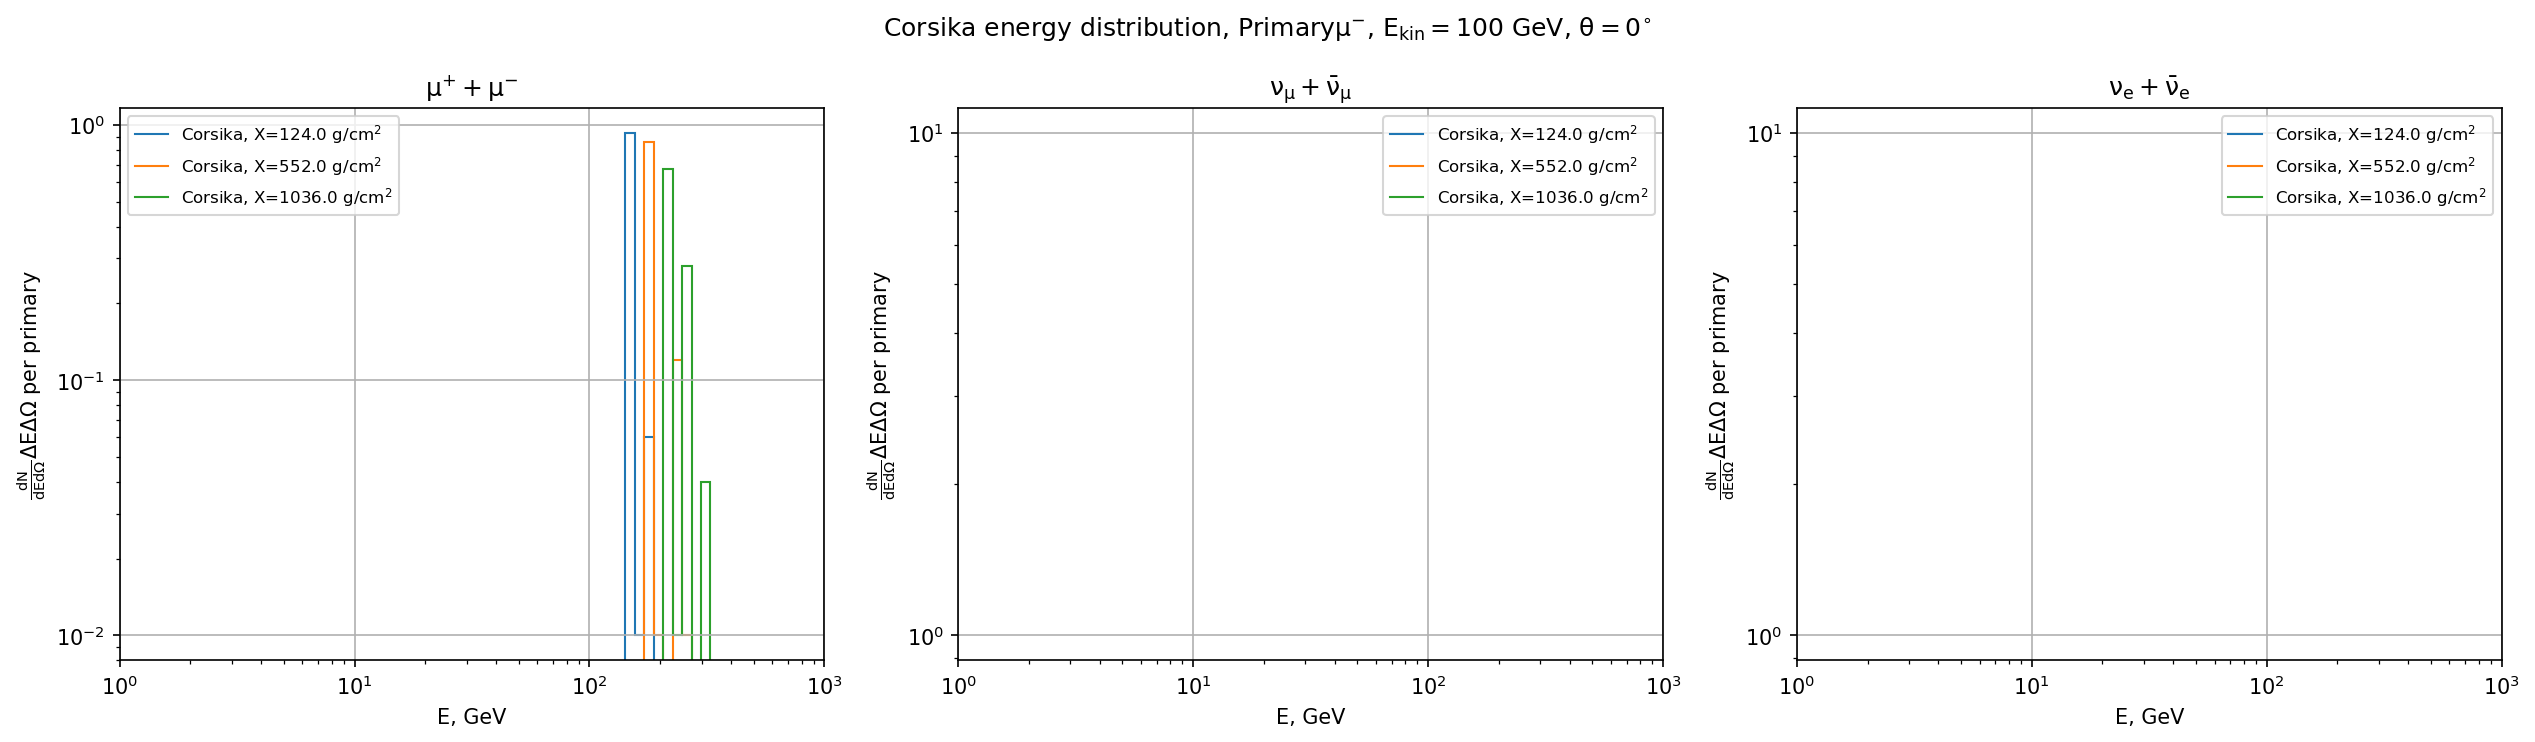

In [24]:
figure_name = "fig_cc_01.svg"
figure = plt.figure(figsize=(17, 5))
grid_spec = figure.add_gridspec(nrows=1, 
                                ncols=3, 
                                width_ratios=[1, 1, 1])

axis = []
for i in range(1):
    axis_row = []
    for j in range(3):
        axis_row.append(figure.add_subplot(grid_spec[i, j]))
    axis.append(axis_row)

ixdepth = 2
xdepths = [143, 647, 1033]
line_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
en_labels = ["1.0-1.3", "2.0-2.5", "4.0-5.0"]


ax = axis[0][0]
for ixdepth in range(3):    
    fl_hist_en = corsika_en_dist[ixdepth]
    line = ax.stairs(fl_hist_en[0], fl_hist_en[1], 
                    label = f"Corsika, {fl_hist_en[3]} " + r"$g/cm^2$",
                    color = line_colors[ixdepth],
                    linestyle = "-")
# Corsika0    
# for ixdepth in range(3):    
#     fl_hist_en = corsika_en_dist0[ixdepth]
#     ax.stairs(fl_hist_en[0], fl_hist_en[1], 
#                     label = f"Corsika_MFalse, {fl_hist_en[3]} " + r"$g/cm^2$",
#                     color = line_colors[ixdepth],
#                     linestyle = "--")
    
ax.set_title(r"$\mu^{+} + \mu^{-}$")

ax.set_xscale("log")
ax.set_xlim(1e0, 1e3)
ax.set_xlabel("E, GeV")

ax.set_yscale("log")
ax.set_ylabel(r"$\frac{dN}{dEd\Omega}\Delta E\Delta \Omega$ per primary")
# plt.yscale("log")
# plt.xlim(0.08, 0.1)
# ax.set_ylim(0, 0.032)
ax.legend(fontsize="8")
ax.grid()          

# Muon mu
ax = axis[0][1]
for ixdepth in range(3):    
    fl_hist_en = corsika_en_dist_munu[ixdepth]
    line = ax.stairs(fl_hist_en[0], fl_hist_en[1], 
                    label = f"Corsika, {fl_hist_en[3]} " + r"$g/cm^2$",
                    color = line_colors[ixdepth],
                    linestyle = "-")
# Corsika0    
# for ixdepth in range(3):    
#     fl_hist_en = corsika_en_dist0[ixdepth]
#     ax.stairs(fl_hist_en[0], fl_hist_en[1], 
#                     label = f"Corsika_MFalse, {fl_hist_en[3]} " + r"$g/cm^2$",
#                     color = line_colors[ixdepth],
#                     linestyle = "--")
    
ax.set_title(r"$\nu_{\mu} + \bar\nu_{\mu}$")

ax.set_xscale("log")
ax.set_xlim(1e0, 1e3)
ax.set_xlabel("E, GeV")

ax.set_yscale("log")
ax.set_ylabel(r"$\frac{dN}{dEd\Omega}\Delta E\Delta \Omega$ per primary")
# plt.yscale("log")
# plt.xlim(0.08, 0.1)
# ax.set_ylim(0, 0.032)
ax.legend(fontsize="8")
ax.grid()   

# Muon e
ax = axis[0][2]
for ixdepth in range(3):    
    fl_hist_en = corsika_en_dist_mue[ixdepth]
    line = ax.stairs(fl_hist_en[0], fl_hist_en[1], 
                    label = f"Corsika, {fl_hist_en[3]} " + r"$g/cm^2$",
                    color = line_colors[ixdepth],
                    linestyle = "-")
# Corsika0    
# for ixdepth in range(3):    
#     fl_hist_en = corsika_en_dist0[ixdepth]
#     ax.stairs(fl_hist_en[0], fl_hist_en[1], 
#                     label = f"Corsika_MFalse, {fl_hist_en[3]} " + r"$g/cm^2$",
#                     color = line_colors[ixdepth],
#                     linestyle = "--")
    
ax.set_title(r"$\nu_e + \bar\nu_e$")

ax.set_xscale("log")
ax.set_xlim(1e0, 1e3)
ax.set_xlabel("E, GeV")

ax.set_yscale("log")
ax.set_ylabel(r"$\frac{dN}{dEd\Omega}\Delta E\Delta \Omega$ per primary")
# plt.yscale("log")
# plt.xlim(0.08, 0.1)
# ax.set_ylim(0, 0.032)
ax.legend(fontsize="8")
ax.grid()   



figure.suptitle(r"Corsika energy distribution, Primary"  + 
            r"$\mu^{-}$, $E_{kin}=100$ GeV, $\theta=0^{\circ}$")

figure.tight_layout()   
plt.savefig(dir_for_figures/figure_name)   

# Corsika_MTrue vs Corsika_MFalse angular distributions

/tmp/ipykernel_3689075/3218475419.py:108: RuntimeWarning: divide by zero encountered in divide
  ax.stairs(crs_comb_mu[0]/crs_comb_mu0[0], np.rad2deg(crs_comb_mu[1]),
/tmp/ipykernel_3689075/3218475419.py:108: RuntimeWarning: invalid value encountered in divide
  ax.stairs(crs_comb_mu[0]/crs_comb_mu0[0], np.rad2deg(crs_comb_mu[1]),


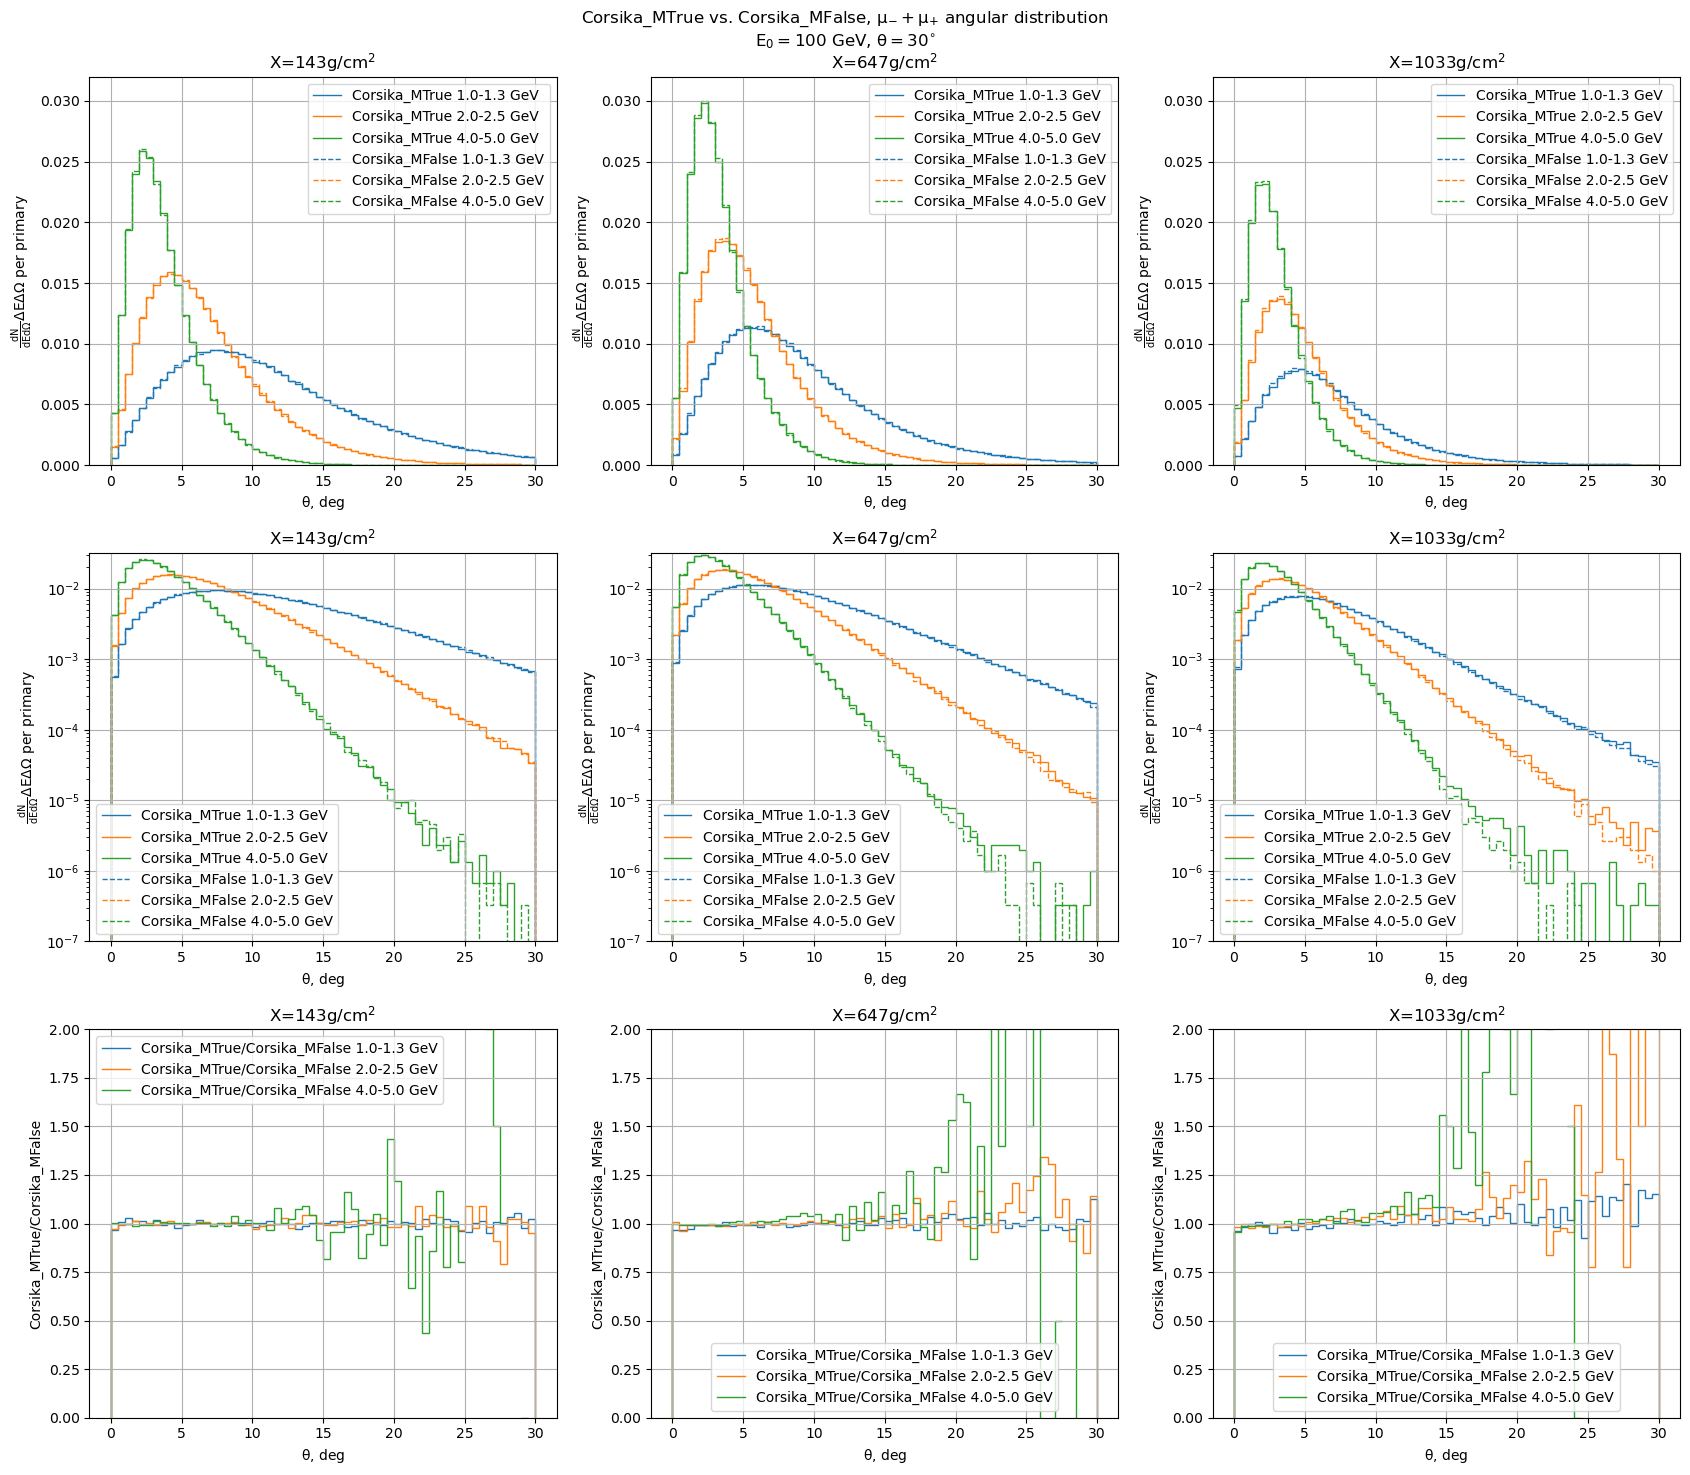

In [127]:
figure_name = "fig_cc_02.svg"

figure = plt.figure(figsize=(17, 15))
grid_spec = figure.add_gridspec(nrows=3, 
                                ncols=3, 
                                width_ratios=[1, 1, 1], 
                                height_ratios=[1, 1, 1])

axis = []
for i in range(3):
    axis_row = []
    for j in range(3):
        axis_row.append(figure.add_subplot(grid_spec[i, j]))
    axis.append(axis_row)

ixdepth = 2
xdepths = [143, 647, 1033]
line_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
en_labels = ["1.0-1.3", "2.0-2.5", "4.0-5.0"]


for ixdepth in range(3):
  ax = axis[0][ixdepth] 
  
  icolor = 0
  ienlabel = 0  
  for i, crs_comb_mu in enumerate(corsika_comb_mu[ixdepth]):
      if i in [0, 2, 4]: # Choose energy ranges to plot
          ax.stairs(crs_comb_mu[0], np.rad2deg(crs_comb_mu[1]), 
                            label = f"Corsika_MTrue {en_labels[ienlabel]} GeV",
                            color = line_colors[icolor],
                            linestyle = "-"
                          )
          icolor += 1
          ienlabel += 1  

  icolor = 0
  ienlabel = 0        
  for i, crs_comb_mu in enumerate(corsika_comb_mu0[ixdepth]):
      if i in [0, 2, 4]: # Choose energy ranges to plot
          ax.stairs(crs_comb_mu[0], np.rad2deg(crs_comb_mu[1]), 
                            label = f"Corsika_MFalse {en_labels[ienlabel]} GeV",
                            color = line_colors[icolor],
                            linestyle = "--"
                          ) 
          icolor += 1
          ienlabel += 1
          
  ax.set_title(f"X={xdepths[ixdepth]}" + r"$g/cm^2$")

  ax.set_xlabel(r"$\theta$, deg")
  ax.set_ylabel(r"$\frac{dN}{dEd\Omega}\Delta E\Delta \Omega$ per primary")
  # plt.yscale("log")
  # plt.xlim(0.08, 0.1)
  ax.set_ylim(0, 0.032)
  ax.legend(fontsize="10")
  ax.grid()

# Log
for ixdepth in range(3):
  ax = axis[1][ixdepth] 
  
  icolor = 0
  ienlabel = 0  
  for i, crs_comb_mu in enumerate(corsika_comb_mu[ixdepth]):
      if i in [0, 2, 4]: # Choose energy ranges to plot
          ax.stairs(crs_comb_mu[0], np.rad2deg(crs_comb_mu[1]), 
                            label = f"Corsika_MTrue {en_labels[ienlabel]} GeV",
                            color = line_colors[icolor],
                            linestyle = "-"
                          )
          icolor += 1
          ienlabel += 1  

  icolor = 0
  ienlabel = 0        
  for i, crs_comb_mu in enumerate(corsika_comb_mu0[ixdepth]):
      if i in [0, 2, 4]: # Choose energy ranges to plot
          ax.stairs(crs_comb_mu[0], np.rad2deg(crs_comb_mu[1]), 
                            label = f"Corsika_MFalse {en_labels[ienlabel]} GeV",
                            color = line_colors[icolor],
                            linestyle = "--"
                          ) 
          icolor += 1
          ienlabel += 1
          
  ax.set_title(f"X={xdepths[ixdepth]}" + r"$g/cm^2$")

  ax.set_xlabel(r"$\theta$, deg")
  ax.set_ylabel(r"$\frac{dN}{dEd\Omega}\Delta E\Delta \Omega$ per primary")
  ax.set_yscale("log")
  # plt.xlim(0.08, 0.1)
  ax.set_ylim(1e-7, 0.032)
  ax.legend(fontsize="10")
  ax.grid()

# Ratio
for ixdepth in range(3):
  ax = axis[2][ixdepth]

  icolor = 0
  ienlabel = 0
  for i, _ in enumerate(corsika_comb_mu[ixdepth]):
      if i in [0, 2, 4]: # Choose energy ranges to plot
          
          crs_comb_mu = corsika_comb_mu[ixdepth][i]
          crs_comb_mu0 = corsika_comb_mu0[ixdepth][i]
          ax.stairs(crs_comb_mu[0]/crs_comb_mu0[0], np.rad2deg(crs_comb_mu[1]), 
                            label = f"Corsika_MTrue/Corsika_MFalse {en_labels[ienlabel]} GeV",
                            color = line_colors[icolor],
                            linestyle = "-"
                          )
          icolor += 1
          ienlabel += 1  
          
          
  ax.set_title(f"X={xdepths[ixdepth]}" + r"$g/cm^2$")

  ax.set_xlabel(r"$\theta$, deg")
  ax.set_ylabel(r"Corsika_MTrue/Corsika_MFalse")
  # plt.yscale("log")
  # plt.xlim(0.08, 0.1)
  ax.set_ylim(0, 2)
  ax.legend(fontsize="10")  
  ax.grid()                 
  
figure.suptitle(r"Corsika_MTrue vs. Corsika_MFalse, $\mu_{-} + \mu_{+}$ angular distribution" + "\n" +
            r"$E_{0}=100$ GeV, $\theta=30^{\circ}$")  
figure.tight_layout()
plt.savefig(dir_for_figures/figure_name)

In [ ]:
# for xdepth in [143, 647, 1033]:
#     plt.stairs(mceq_hists[13][xdepth]["hist_en_ang"].T[0],
#                 mceq_hists[13][xdepth]["en_bins"], label = f"MCEq, X={xdepth}")
xdepth_list = [143, 647, 1033]

line_colors = []
for ixdepth in range(3):
    
    line = plt.stairs(mceq_hists_en[13][xdepth_list[ixdepth]]["hist_en_ang"].T[0],
            mceq_hists_en[13][xdepth_list[ixdepth]]["en_bins"], 
            label = f"MCEq2D, X={xdepth_list[ixdepth]} " + r"$g/cm^2$",
            # color = line.get_edgecolor(),
                #   linestyle = "--"
                    )
    line_colors.append(line.get_edgecolor())
    
for ixdepth in range(3):    
    fl_hist_en = fluka_hist_en["current"][ixdepth]
    plt.stairs(fl_hist_en[1], fl_hist_en[0], 
                      label = f"Fluka, X={fl_hist_en[3]} " + r"$g/cm^2$",
                      color = line_colors[ixdepth],
                      linestyle = "--")


# Corsika
for ixdepth in range(3):    
    fl_hist_en = corsika_en_dist[ixdepth]
    plt.stairs(fl_hist_en[0], fl_hist_en[1], 
                      label = f"Corsika, {fl_hist_en[3]} " + r"$g/cm^2$",
                      color = line_colors[ixdepth],
                      linestyle = ":")
    
    # fl_hist_en = corsika_en_dist[ixdepth]
    # plt.stairs(fl_hist_en[0], fl_hist_en[1], 
    #                   label = f"corsika {fl_hist_en[3]} g/cm2",
    #                   color = line.get_edgecolor(),
    #                   linestyle = ":"
    #                   )

plt.xscale("log")
plt.xlim(1e-1, 1e2)
plt.yscale("log")
plt.xlabel("E, GeV")
plt.ylabel(r"$\frac{dN}{dE}\Delta E$ per primary")
plt.legend(fontsize="8")   
plt.title(r"MCEq2D vs. Fluka(2021) vs. Corsika, $\mu_{-} + \mu_{+}$ energy spectra" + "\n"
          r"$E_{0}=100$ GeV, $\theta=30^{\circ}$")
plt.savefig(dir_for_figures/'fig01_02.png')

In [ ]:
xdepth_list = [143, 647, 1033]

line_colors = []

# Fluka
for ixdepth in range(3):
  cr_hist_en = corsika_en_dist[ixdepth]
  fl_hist_en = fluka_hist_en["current"][ixdepth]
  line = plt.stairs(fl_hist_en[1]/cr_hist_en[0],
              fl_hist_en[0], 
              label = f"Fluka/Corsika, X={xdepth_list[ixdepth]} " + r"$g/cm^2$")
  
  line_colors.append(line.get_edgecolor())
  
# Corsika
# for ixdepth in range(3):    
#     fl_hist_en = corsika_en_dist[ixdepth]
#     plt.stairs(fl_hist_en[0], fl_hist_en[1], 
#                       label = f"Corsika, {fl_hist_en[3]} " + r"$g/cm^2$",
#                       color = line_colors[ixdepth],
#                       linestyle = "--")

plt.xscale("log")
plt.xlim(3e-1, 1e2)
plt.ylim(0.75, 1.5)
# plt.yscale("log")
plt.xlabel("E, GeV")
plt.ylabel(r"$\frac{dN}{dE}\Delta E$ per primary")
plt.legend(fontsize="8")   
plt.title(r"Ratio of Fluka/Corsika of $\mu_{-} + \mu_{+}$ energy spectra" + "\n"
          r"$E_{0}=100$ GeV, $\theta=30^{\circ}$")
plt.grid()
plt.savefig(dir_for_figures/'fig01_03.png')

# Anglular distributions

In [ ]:
# Get MCEq histogram
angle_bins = fluka_ang_bins
energy_bins = [1, 1.3, 2, 2.5, 4, 5]
mceq_hists_ang = mceq_dists.histograms(energy_bins, angle_bins)

In [ ]:
xdepth = 143
line_colors = []
for ind_energy, en1 in enumerate(mceq_hists_en[13][xdepth]["en_bins"]):
    if ind_energy in [0, 2, 4]:
        mceq_plt = mceq_hists_ang[13][xdepth]
        en_range = mceq_plt["en_bins"][ind_energy:ind_energy +2]
        en_label = f"{en_range[0]:0.1f}-{en_range[1]:0.1f}"
        line = plt.stairs(mceq_plt["hist_en_ang"][ind_energy],
                    np.rad2deg(mceq_plt["ang_bins"]),
                    label = f"MCEq {en_label} GeV")
        line_colors.append(line.get_edgecolor())
        
        
for ixdepth in range(3):
    for ienergy in range(3):
        if (ienergy in [0, 1, 2]) and (ixdepth in [0]):
            fl_dist = fluka_hist["current"][ixdepth][ienergy]
            line = plt.stairs(fl_dist[1], np.rad2deg(fl_dist[0]),
                    label = f"Fluka {fl_dist[4]} GeV",
                    color = line_colors[ienergy],
                    linestyle = "--")      
        
        
plt.title(r"Fluka vs. MCEq2D, $\mu_{-} + \mu_{+}$ angular distribution" + "\n" +
          r"$E_{0}=100$ GeV, $\theta=30^{\circ}$" + f", X={xdepth}" + r"$g/cm^2$")
plt.xlabel(r"$\theta$, deg")
plt.ylabel(r"$\frac{dN}{dEd\Omega}\Delta E\Delta \Omega$ per primary")
# plt.yscale("log")
# plt.xlim(0.08, 0.1)
# plt.ylim(20, 25)
plt.legend(fontsize="8")  
plt.legend()
plt.savefig(dir_for_figures/'fig10.png')

In [ ]:
xdepth = 143
line_colors = []
for ind_energy, en1 in enumerate(mceq_hists_en[13][xdepth]["en_bins"]):
    if ind_energy in [0, 2, 4]:
        mceq_plt = mceq_hists_ang[13][xdepth]
        en_range = mceq_plt["en_bins"][ind_energy:ind_energy +2]
        en_label = f"{en_range[0]:0.1f}-{en_range[1]:0.1f}"
        line = plt.stairs(mceq_plt["hist_en_ang"][ind_energy],
                    np.rad2deg(mceq_plt["ang_bins"]),
                    label = f"MCEq {en_label} GeV")
        line_colors.append(line.get_edgecolor())
        
        
for ixdepth in range(3):
    for ienergy in range(3):
        if (ienergy in [0, 1, 2]) and (ixdepth in [0]):
            fl_dist = fluka_hist["current"][ixdepth][ienergy]
            line = plt.stairs(fl_dist[1], np.rad2deg(fl_dist[0]),
                    label = f"Fluka {fl_dist[4]} GeV",
                    color = line_colors[ienergy],
                    linestyle = "--")      
        
        
plt.title(r"Fluka vs. MCEq2D, $\mu_{-} + \mu_{+}$ angular distribution" + "\n" +
          r"$E_{0}=100$ GeV, $\theta=30^{\circ}$" + f", X={xdepth}" + r"$g/cm^2$")
plt.xlabel(r"$\theta$, deg")
plt.ylabel(r"$\frac{dN}{dEd\Omega}\Delta E\Delta \Omega$ per primary")
plt.yscale("log")
# plt.xlim(0.08, 0.1)
# plt.ylim(20, 25)
plt.legend(fontsize="8")  
plt.legend()
plt.savefig(dir_for_figures/'fig11.png')

In [ ]:
xdepth = 143
ixdepth = 0
line_colors = []
ienergy = 0
for ind_energy, en1 in enumerate(mceq_hists_en[13][xdepth]["en_bins"]):
    if ind_energy in [0, 2, 4]:
        mceq_plt = mceq_hists_ang[13][xdepth]
        en_range = mceq_plt["en_bins"][ind_energy:ind_energy +2]
        en_label = f"{en_range[0]:0.1f}-{en_range[1]:0.1f}"
        
        fl_dist = fluka_hist["current"][ixdepth][ienergy]
        ienergy += 1
        line = plt.stairs(fl_dist[1]/mceq_plt["hist_en_ang"][ind_energy],
                    np.rad2deg(mceq_plt["ang_bins"]),
                    label = f"Fluka/MCEq {en_label} GeV")
        line_colors.append(line.get_edgecolor())
        
        
# for ixdepth in range(3):
#     for ienergy in range(3):
#         if (ienergy in [0, 1, 2]) and (ixdepth in [0]):
#             fl_dist = fluka_hist["current"][ixdepth][ienergy]
#             line = plt.stairs(fl_dist[1], np.rad2deg(fl_dist[0]),
#                     label = f"current: {fl_dist[4]} GeV",
#                     color = line_colors[ienergy],
#                     linestyle = "--")      
        
        
plt.title(r"Ratio Fluka/MCEq2D of $\mu_{-} + \mu_{+}$ angular distributions" + "\n" +
          r"$E_{0}=100$ GeV, $\theta=30^{\circ}$" + f", X={xdepth}" + r"$g/cm^2$")
plt.xlabel(r"$\theta$, deg")
plt.ylabel(r"Fluka/MCEq")
# plt.yscale("log")
plt.xlim(0, 20)
plt.ylim(0.3, 1.2)
plt.grid()
plt.legend(fontsize="8", loc = "best")  
plt.savefig(dir_for_figures/'fig12.png')

In [ ]:
xdepth = 647
line_colors = []
for ind_energy, en1 in enumerate(mceq_hists_en[13][xdepth]["en_bins"]):
    if ind_energy in [0, 2, 4]:
        mceq_plt = mceq_hists_ang[13][xdepth]
        en_range = mceq_plt["en_bins"][ind_energy:ind_energy +2]
        en_label = f"{en_range[0]:0.1f}-{en_range[1]:0.1f}"
        line = plt.stairs(mceq_plt["hist_en_ang"][ind_energy],
                    np.rad2deg(mceq_plt["ang_bins"]),
                    label = f"MCEq {en_label} GeV")
        line_colors.append(line.get_edgecolor())
        
        
for ixdepth in range(3):
    for ienergy in range(3):
        if (ienergy in [0, 1, 2]) and (ixdepth in [1]):
            fl_dist = fluka_hist["current"][ixdepth][ienergy]
            line = plt.stairs(fl_dist[1], np.rad2deg(fl_dist[0]),
                    label = f"Fluka {fl_dist[4]} GeV",
                    color = line_colors[ienergy],
                    linestyle = "--")      
        
        
plt.title(r"Fluka vs. MCEq2D, $\mu_{-} + \mu_{+}$ angular distribution" + "\n" +
          r"$E_{0}=100$ GeV, $\theta=30^{\circ}$" + f", X={xdepth}" + r"$g/cm^2$")
plt.xlabel(r"$\theta$, deg")
plt.ylabel(r"$\frac{dN}{dEd\Omega}\Delta E\Delta \Omega$ per primary")
# plt.yscale("log")
# plt.xlim(0.08, 0.1)
# plt.ylim(20, 25)
plt.legend(fontsize="8")  
plt.legend()
plt.savefig(dir_for_figures/'fig13.png')

In [ ]:
xdepth = 647
line_colors = []
for ind_energy, en1 in enumerate(mceq_hists_en[13][xdepth]["en_bins"]):
    if ind_energy in [0, 2, 4]:
        mceq_plt = mceq_hists_ang[13][xdepth]
        en_range = mceq_plt["en_bins"][ind_energy:ind_energy +2]
        en_label = f"{en_range[0]:0.1f}-{en_range[1]:0.1f}"
        line = plt.stairs(mceq_plt["hist_en_ang"][ind_energy],
                    np.rad2deg(mceq_plt["ang_bins"]),
                    label = f"MCEq {en_label} GeV")
        line_colors.append(line.get_edgecolor())
        
        
for ixdepth in range(3):
    for ienergy in range(3):
        if (ienergy in [0, 1, 2]) and (ixdepth in [1]):
            fl_dist = fluka_hist["current"][ixdepth][ienergy]
            line = plt.stairs(fl_dist[1], np.rad2deg(fl_dist[0]),
                    label = f"Fluka {fl_dist[4]} GeV",
                    color = line_colors[ienergy],
                    linestyle = "--")      
        
        
plt.title(r"Fluka vs. MCEq2D, $\mu_{-} + \mu_{+}$ angular distribution" + "\n" +
          r"$E_{0}=100$ GeV, $\theta=30^{\circ}$" + f", X={xdepth}" + r"$g/cm^2$")
plt.xlabel(r"$\theta$, deg")
plt.ylabel(r"$\frac{dN}{dEd\Omega}\Delta E\Delta \Omega$ per primary")
plt.yscale("log")
# plt.xlim(0.08, 0.1)
# plt.ylim(20, 25)
plt.legend(fontsize="8")  
plt.legend()
plt.savefig(dir_for_figures/'fig14.png')

In [ ]:
figure_name = "fig15.png"
xdepth = 647
ixdepth = 1
line_colors = []
ienergy = 0
for ind_energy, en1 in enumerate(mceq_hists_en[13][xdepth]["en_bins"]):
    if ind_energy in [0, 2, 4]:
        mceq_plt = mceq_hists_ang[13][xdepth]
        en_range = mceq_plt["en_bins"][ind_energy:ind_energy +2]
        en_label = f"{en_range[0]:0.1f}-{en_range[1]:0.1f}"
        
        fl_dist = fluka_hist["current"][ixdepth][ienergy]
        ienergy += 1
        line = plt.stairs(fl_dist[1]/mceq_plt["hist_en_ang"][ind_energy],
                    np.rad2deg(mceq_plt["ang_bins"]),
                    label = f"Fluka/MCEq {en_label} GeV")
        line_colors.append(line.get_edgecolor())
        
        
# for ixdepth in range(3):
#     for ienergy in range(3):
#         if (ienergy in [0, 1, 2]) and (ixdepth in [0]):
#             fl_dist = fluka_hist["current"][ixdepth][ienergy]
#             line = plt.stairs(fl_dist[1], np.rad2deg(fl_dist[0]),
#                     label = f"current: {fl_dist[4]} GeV",
#                     color = line_colors[ienergy],
#                     linestyle = "--")      
        
        
plt.title(r"Ratio Fluka/MCEq2D of $\mu_{-} + \mu_{+}$ angular distributions" + "\n" +
          r"$E_{0}=100$ GeV, $\theta=30^{\circ}$" + f", X={xdepth}" + r"$g/cm^2$")
plt.xlabel(r"$\theta$, deg")
plt.ylabel(r"Fluka/MCEq")
# plt.yscale("log")
plt.xlim(0, 20)
plt.ylim(0.1, 1.2)
plt.grid()
plt.legend(fontsize="8", loc = "best")  
plt.savefig(dir_for_figures/figure_name)

In [ ]:
figure_name = "fig16.png"
xdepth = 1033
line_colors = []
for ind_energy, en1 in enumerate(mceq_hists_en[13][xdepth]["en_bins"]):
    if ind_energy in [0, 2, 4]:
        mceq_plt = mceq_hists_ang[13][xdepth]
        en_range = mceq_plt["en_bins"][ind_energy:ind_energy +2]
        en_label = f"{en_range[0]:0.1f}-{en_range[1]:0.1f}"
        line = plt.stairs(mceq_plt["hist_en_ang"][ind_energy],
                    np.rad2deg(mceq_plt["ang_bins"]),
                    label = f"MCEq {en_label} GeV")
        line_colors.append(line.get_edgecolor())
        
        
for ixdepth in range(3):
    for ienergy in range(3):
        if (ienergy in [0, 1, 2]) and (ixdepth in [2]):
            fl_dist = fluka_hist["current"][ixdepth][ienergy]
            line = plt.stairs(fl_dist[1], np.rad2deg(fl_dist[0]),
                    label = f"Fluka {fl_dist[4]} GeV",
                    color = line_colors[ienergy],
                    linestyle = "--")      
        
        
plt.title(r"Fluka vs. MCEq2D, $\mu_{-} + \mu_{+}$ angular distribution" + "\n" +
          r"$E_{0}=100$ GeV, $\theta=30^{\circ}$" + f", X={xdepth}" + r"$g/cm^2$")
plt.xlabel(r"$\theta$, deg")
plt.ylabel(r"$\frac{dN}{dEd\Omega}\Delta E\Delta \Omega$ per primary")
# plt.yscale("log")
# plt.xlim(0.08, 0.1)
# plt.ylim(20, 25)
plt.legend(fontsize="8")  
plt.legend()
plt.savefig(dir_for_figures/figure_name)

In [ ]:
figure_name = "fig17.png"
xdepth = 1033
line_colors = []
for ind_energy, en1 in enumerate(mceq_hists_en[13][xdepth]["en_bins"]):
    if ind_energy in [0, 2, 4]:
        mceq_plt = mceq_hists_ang[13][xdepth]
        en_range = mceq_plt["en_bins"][ind_energy:ind_energy +2]
        en_label = f"{en_range[0]:0.1f}-{en_range[1]:0.1f}"
        line = plt.stairs(mceq_plt["hist_en_ang"][ind_energy],
                    np.rad2deg(mceq_plt["ang_bins"]),
                    label = f"MCEq {en_label} GeV")
        line_colors.append(line.get_edgecolor())
        
        
for ixdepth in range(3):
    for ienergy in range(3):
        if (ienergy in [0, 1, 2]) and (ixdepth in [2]):
            fl_dist = fluka_hist["current"][ixdepth][ienergy]
            line = plt.stairs(fl_dist[1], np.rad2deg(fl_dist[0]),
                    label = f"Fluka {fl_dist[4]} GeV",
                    color = line_colors[ienergy],
                    linestyle = "--")      
        
        
plt.title(r"Fluka vs. MCEq2D, $\mu_{-} + \mu_{+}$ angular distribution" + "\n" +
          r"$E_{0}=100$ GeV, $\theta=30^{\circ}$" + f", X={xdepth}" + r"$g/cm^2$")
plt.xlabel(r"$\theta$, deg")
plt.ylabel(r"$\frac{dN}{dEd\Omega}\Delta E\Delta \Omega$ per primary")
plt.yscale("log")
# plt.xlim(0.08, 0.1)
# plt.ylim(20, 25)
plt.legend(fontsize="8")  
plt.legend()
plt.savefig(dir_for_figures/figure_name)

In [ ]:
figure_name = "fig18.png"
xdepth = 1033
ixdepth = 2
line_colors = []
ienergy = 0
for ind_energy, en1 in enumerate(mceq_hists_en[13][xdepth]["en_bins"]):
    if ind_energy in [0, 2, 4]:
        mceq_plt = mceq_hists_ang[13][xdepth]
        en_range = mceq_plt["en_bins"][ind_energy:ind_energy +2]
        en_label = f"{en_range[0]:0.1f}-{en_range[1]:0.1f}"
        
        fl_dist = fluka_hist["current"][ixdepth][ienergy]
        ienergy += 1
        line = plt.stairs(fl_dist[1]/mceq_plt["hist_en_ang"][ind_energy],
                    np.rad2deg(mceq_plt["ang_bins"]),
                    label = f"Fluka/MCEq {en_label} GeV")
        line_colors.append(line.get_edgecolor())
        
        
# for ixdepth in range(3):
#     for ienergy in range(3):
#         if (ienergy in [0, 1, 2]) and (ixdepth in [0]):
#             fl_dist = fluka_hist["current"][ixdepth][ienergy]
#             line = plt.stairs(fl_dist[1], np.rad2deg(fl_dist[0]),
#                     label = f"current: {fl_dist[4]} GeV",
#                     color = line_colors[ienergy],
#                     linestyle = "--")      
        
        
plt.title(r"Ratio Fluka/MCEq2D of $\mu_{-} + \mu_{+}$ angular distributions" + "\n" +
          r"$E_{0}=100$ GeV, $\theta=30^{\circ}$" + f", X={xdepth}" + r"$g/cm^2$")
plt.xlabel(r"$\theta$, deg")
plt.ylabel(r"Fluka/MCEq")
# plt.yscale("log")
plt.xlim(0, 20)
plt.ylim(0, 1.2)
plt.grid()
plt.legend(fontsize="8", loc = "best")  
plt.savefig(dir_for_figures/figure_name)

# Corsika vs Fluka

In [ ]:
figure_name = "fig02_01.png"
xdepth = 143
ixdepth = 0
line_colors = []
en_labels = []
for ind_energy, en1 in enumerate(mceq_hists_en[13][xdepth]["en_bins"]):
    if ind_energy in [0, 2, 4]:
        mceq_plt = mceq_hists_ang[13][xdepth]
        en_range = mceq_plt["en_bins"][ind_energy:ind_energy +2]
        en_label = f"{en_range[0]:0.1f}-{en_range[1]:0.1f}"
        # line = plt.stairs(mceq_plt["hist_en_ang"][ind_energy],
        #             np.rad2deg(mceq_plt["ang_bins"]),
        #             label = f"MCEq {en_label} GeV")
        # line_colors.append(line.get_edgecolor())
        en_labels.append(en_label)

icolor = 0
ienlabel = 0
for i, crs_comb_mu in enumerate(corsika_comb_mu[ixdepth]):
    if i in [0, 2, 4]: # Choose energy ranges to plot
        line = plt.stairs(crs_comb_mu[0], np.rad2deg(crs_comb_mu[1]), 
                          label = f"Corsika {en_labels[ienlabel]} GeV",
                        #   color = line_colors[icolor],
                        #   linestyle = "--"
                        )
        
        line_colors.append(line.get_edgecolor())
        en_labels.append(en_label)
        icolor += 1
        ienlabel += 1  
        
for ixdepth in range(3):
    for ienergy in range(3):
        if (ienergy in [0, 1, 2]) and (ixdepth in [0]):
            fl_dist = fluka_hist["current"][ixdepth][ienergy]
            line = plt.stairs(fl_dist[1], np.rad2deg(fl_dist[0]),
                    label = f"Fluka {fl_dist[4]} GeV",
                    color = line_colors[ienergy],
                    linestyle = "--")          
          
        
        
plt.title(r"Corsika vs. Fluka, $\mu_{-} + \mu_{+}$ angular distribution" + "\n" +
          r"$E_{0}=100$ GeV, $\theta=30^{\circ}$" + f", X={xdepth}" + r"$g/cm^2$")
plt.xlabel(r"$\theta$, deg")
plt.ylabel(r"$\frac{dN}{dEd\Omega}\Delta E\Delta \Omega$ per primary")
# plt.yscale("log")
# plt.xlim(0.08, 0.1)
# plt.ylim(20, 25)
plt.legend(fontsize="8")  
plt.legend()
plt.savefig(dir_for_figures/figure_name)

In [ ]:
figure_name = "fig02_02.png"
xdepth = 143
ixdepth = 0
line_colors = []
en_labels = []
for ind_energy, en1 in enumerate(mceq_hists_en[13][xdepth]["en_bins"]):
    if ind_energy in [0, 2, 4]:
        mceq_plt = mceq_hists_ang[13][xdepth]
        en_range = mceq_plt["en_bins"][ind_energy:ind_energy +2]
        en_label = f"{en_range[0]:0.1f}-{en_range[1]:0.1f}"
        # line = plt.stairs(mceq_plt["hist_en_ang"][ind_energy],
        #             np.rad2deg(mceq_plt["ang_bins"]),
        #             label = f"MCEq {en_label} GeV")
        # line_colors.append(line.get_edgecolor())
        en_labels.append(en_label)

icolor = 0
ienlabel = 0
for i, crs_comb_mu in enumerate(corsika_comb_mu[ixdepth]):
    if i in [0, 2, 4]: # Choose energy ranges to plot
        line = plt.stairs(crs_comb_mu[0], np.rad2deg(crs_comb_mu[1]), 
                          label = f"Corsika {en_labels[ienlabel]} GeV",
                        #   color = line_colors[icolor],
                        #   linestyle = "--"
                        )
        
        line_colors.append(line.get_edgecolor())
        en_labels.append(en_label)
        icolor += 1
        ienlabel += 1  
        
for ixdepth in range(3):
    for ienergy in range(3):
        if (ienergy in [0, 1, 2]) and (ixdepth in [0]):
            fl_dist = fluka_hist["current"][ixdepth][ienergy]
            line = plt.stairs(fl_dist[1], np.rad2deg(fl_dist[0]),
                    label = f"Fluka {fl_dist[4]} GeV",
                    color = line_colors[ienergy],
                    linestyle = "--")          
          
        
        
plt.title(r"Corsika vs. Fluka, $\mu_{-} + \mu_{+}$ angular distribution" + "\n" +
          r"$E_{0}=100$ GeV, $\theta=30^{\circ}$" + f", X={xdepth}" + r"$g/cm^2$")
plt.xlabel(r"$\theta$, deg")
plt.ylabel(r"$\frac{dN}{dEd\Omega}\Delta E\Delta \Omega$ per primary")
plt.yscale("log")
# plt.xlim(0.08, 0.1)
# plt.ylim(20, 25)
plt.legend(fontsize="8")  
plt.legend()
plt.savefig(dir_for_figures/figure_name)

In [ ]:
figure_name = "fig02_03.png"
xdepth = 143
ixdepth = 0
line_colors = []
ienergy = 0

for ind_energy, crs_comb_mu in enumerate(corsika_comb_mu[ixdepth]):
    if ind_energy in [0, 2, 4]:
        mceq_plt = mceq_hists_ang[13][xdepth]
        en_range = mceq_plt["en_bins"][ind_energy:ind_energy +2]
        en_label = f"{en_range[0]:0.1f}-{en_range[1]:0.1f}"
        
        fl_dist = fluka_hist["current"][ixdepth][ienergy]
        ienergy += 1
        line = plt.stairs(fl_dist[1]/crs_comb_mu[0],
                    np.rad2deg(crs_comb_mu[1]),
                    label = f"Fluka/Corsika {en_label} GeV")
        line_colors.append(line.get_edgecolor())  
        
        
plt.title(r"Ratio Fluka/Corsika of $\mu_{-} + \mu_{+}$ angular distributions" + "\n" +
          r"$E_{0}=100$ GeV, $\theta=30^{\circ}$" + f", X={xdepth}" + r"$g/cm^2$")
plt.xlabel(r"$\theta$, deg")
plt.ylabel(r"Fluka/MCEq")
# plt.yscale("log")
plt.xlim(0, 20)
plt.ylim(0, 1.5)
plt.grid()
plt.legend(fontsize="8", loc = "best")  
plt.savefig(dir_for_figures/figure_name)

In [ ]:
figure_name = "fig02_04.png"
xdepth = 647
ixdepth = 1
line_colors = []
en_labels = []
for ind_energy, en1 in enumerate(mceq_hists_en[13][xdepth]["en_bins"]):
    if ind_energy in [0, 2, 4]:
        mceq_plt = mceq_hists_ang[13][xdepth]
        en_range = mceq_plt["en_bins"][ind_energy:ind_energy +2]
        en_label = f"{en_range[0]:0.1f}-{en_range[1]:0.1f}"
        # line = plt.stairs(mceq_plt["hist_en_ang"][ind_energy],
        #             np.rad2deg(mceq_plt["ang_bins"]),
        #             label = f"MCEq {en_label} GeV")
        # line_colors.append(line.get_edgecolor())
        en_labels.append(en_label)

icolor = 0
ienlabel = 0
for i, crs_comb_mu in enumerate(corsika_comb_mu[ixdepth]):
    if i in [0, 2, 4]: # Choose energy ranges to plot
        line = plt.stairs(crs_comb_mu[0], np.rad2deg(crs_comb_mu[1]), 
                          label = f"Corsika {en_labels[ienlabel]} GeV",
                        #   color = line_colors[icolor],
                        #   linestyle = "--"
                        )
        
        line_colors.append(line.get_edgecolor())
        en_labels.append(en_label)
        icolor += 1
        ienlabel += 1  
        
for ixdepth in range(3):
    for ienergy in range(3):
        if (ienergy in [0, 1, 2]) and (ixdepth in [0]):
            fl_dist = fluka_hist["current"][ixdepth][ienergy]
            line = plt.stairs(fl_dist[1], np.rad2deg(fl_dist[0]),
                    label = f"Fluka {fl_dist[4]} GeV",
                    color = line_colors[ienergy],
                    linestyle = "--")          
          
        
        
plt.title(r"Corsika vs. Fluka, $\mu_{-} + \mu_{+}$ angular distribution" + "\n" +
          r"$E_{0}=100$ GeV, $\theta=30^{\circ}$" + f", X={xdepth}" + r"$g/cm^2$")
plt.xlabel(r"$\theta$, deg")
plt.ylabel(r"$\frac{dN}{dEd\Omega}\Delta E\Delta \Omega$ per primary")
# plt.yscale("log")
# plt.xlim(0.08, 0.1)
# plt.ylim(20, 25)
plt.legend(fontsize="8")  
plt.legend()
plt.savefig(dir_for_figures/figure_name)

In [ ]:
figure_name = "fig02_05.png"
xdepth = 647
ixdepth = 1
line_colors = []
en_labels = []
for ind_energy, en1 in enumerate(mceq_hists_en[13][xdepth]["en_bins"]):
    if ind_energy in [0, 2, 4]:
        mceq_plt = mceq_hists_ang[13][xdepth]
        en_range = mceq_plt["en_bins"][ind_energy:ind_energy +2]
        en_label = f"{en_range[0]:0.1f}-{en_range[1]:0.1f}"
        # line = plt.stairs(mceq_plt["hist_en_ang"][ind_energy],
        #             np.rad2deg(mceq_plt["ang_bins"]),
        #             label = f"MCEq {en_label} GeV")
        # line_colors.append(line.get_edgecolor())
        en_labels.append(en_label)

icolor = 0
ienlabel = 0
for i, crs_comb_mu in enumerate(corsika_comb_mu[ixdepth]):
    if i in [0, 2, 4]: # Choose energy ranges to plot
        line = plt.stairs(crs_comb_mu[0], np.rad2deg(crs_comb_mu[1]), 
                          label = f"Corsika {en_labels[ienlabel]} GeV",
                        #   color = line_colors[icolor],
                        #   linestyle = "--"
                        )
        
        line_colors.append(line.get_edgecolor())
        en_labels.append(en_label)
        icolor += 1
        ienlabel += 1  
        
for ixdepth in range(3):
    for ienergy in range(3):
        if (ienergy in [0, 1, 2]) and (ixdepth in [0]):
            fl_dist = fluka_hist["current"][ixdepth][ienergy]
            line = plt.stairs(fl_dist[1], np.rad2deg(fl_dist[0]),
                    label = f"Fluka {fl_dist[4]} GeV",
                    color = line_colors[ienergy],
                    linestyle = "--")          
          
        
        
plt.title(r"Corsika vs. Fluka, $\mu_{-} + \mu_{+}$ angular distribution" + "\n" +
          r"$E_{0}=100$ GeV, $\theta=30^{\circ}$" + f", X={xdepth}" + r"$g/cm^2$")
plt.xlabel(r"$\theta$, deg")
plt.ylabel(r"$\frac{dN}{dEd\Omega}\Delta E\Delta \Omega$ per primary")
plt.yscale("log")
# plt.xlim(0.08, 0.1)
# plt.ylim(20, 25)
plt.legend(fontsize="8")  
plt.legend()
plt.savefig(dir_for_figures/figure_name)

In [ ]:
figure_name = "fig02_06.png"
xdepth = 647
ixdepth = 1
line_colors = []
ienergy = 0

for ind_energy, crs_comb_mu in enumerate(corsika_comb_mu[ixdepth]):
    if ind_energy in [0, 2, 4]:
        mceq_plt = mceq_hists_ang[13][xdepth]
        en_range = mceq_plt["en_bins"][ind_energy:ind_energy +2]
        en_label = f"{en_range[0]:0.1f}-{en_range[1]:0.1f}"
        
        fl_dist = fluka_hist["current"][ixdepth][ienergy]
        ienergy += 1
        line = plt.stairs(fl_dist[1]/crs_comb_mu[0],
                    np.rad2deg(crs_comb_mu[1]),
                    label = f"Fluka/Corsika {en_label} GeV")
        line_colors.append(line.get_edgecolor())  
        
        
plt.title(r"Ratio Fluka/Corsika of $\mu_{-} + \mu_{+}$ angular distributions" + "\n" +
          r"$E_{0}=100$ GeV, $\theta=30^{\circ}$" + f", X={xdepth}" + r"$g/cm^2$")
plt.xlabel(r"$\theta$, deg")
plt.ylabel(r"Fluka/MCEq")
# plt.yscale("log")
plt.xlim(0, 20)
plt.ylim(0, 1.5)
plt.grid()
plt.legend(fontsize="8", loc = "best")  
plt.savefig(dir_for_figures/figure_name)

In [ ]:
figure_name = "fig02_07.png"
xdepth = 1033
ixdepth = 2
line_colors = []
en_labels = []
for ind_energy, en1 in enumerate(mceq_hists_en[13][xdepth]["en_bins"]):
    if ind_energy in [0, 2, 4]:
        mceq_plt = mceq_hists_ang[13][xdepth]
        en_range = mceq_plt["en_bins"][ind_energy:ind_energy +2]
        en_label = f"{en_range[0]:0.1f}-{en_range[1]:0.1f}"
        # line = plt.stairs(mceq_plt["hist_en_ang"][ind_energy],
        #             np.rad2deg(mceq_plt["ang_bins"]),
        #             label = f"MCEq {en_label} GeV")
        # line_colors.append(line.get_edgecolor())
        en_labels.append(en_label)

icolor = 0
ienlabel = 0
for i, crs_comb_mu in enumerate(corsika_comb_mu[ixdepth]):
    if i in [0, 2, 4]: # Choose energy ranges to plot
        line = plt.stairs(crs_comb_mu[0], np.rad2deg(crs_comb_mu[1]), 
                          label = f"Corsika {en_labels[ienlabel]} GeV",
                        #   color = line_colors[icolor],
                        #   linestyle = "--"
                        )
        
        line_colors.append(line.get_edgecolor())
        en_labels.append(en_label)
        icolor += 1
        ienlabel += 1  
        
for ixdepth in range(3):
    for ienergy in range(3):
        if (ienergy in [0, 1, 2]) and (ixdepth in [0]):
            fl_dist = fluka_hist["current"][ixdepth][ienergy]
            line = plt.stairs(fl_dist[1], np.rad2deg(fl_dist[0]),
                    label = f"Fluka {fl_dist[4]} GeV",
                    color = line_colors[ienergy],
                    linestyle = "--")          
          
        
        
plt.title(r"Corsika vs. Fluka, $\mu_{-} + \mu_{+}$ angular distribution" + "\n" +
          r"$E_{0}=100$ GeV, $\theta=30^{\circ}$" + f", X={xdepth}" + r"$g/cm^2$")
plt.xlabel(r"$\theta$, deg")
plt.ylabel(r"$\frac{dN}{dEd\Omega}\Delta E\Delta \Omega$ per primary")
# plt.yscale("log")
# plt.xlim(0.08, 0.1)
# plt.ylim(20, 25)
plt.legend(fontsize="8")  
plt.legend()
plt.savefig(dir_for_figures/figure_name)

In [ ]:
figure_name = "fig02_08.png"
xdepth = 1033
ixdepth = 2
line_colors = []
en_labels = []
for ind_energy, en1 in enumerate(mceq_hists_en[13][xdepth]["en_bins"]):
    if ind_energy in [0, 2, 4]:
        mceq_plt = mceq_hists_ang[13][xdepth]
        en_range = mceq_plt["en_bins"][ind_energy:ind_energy +2]
        en_label = f"{en_range[0]:0.1f}-{en_range[1]:0.1f}"
        # line = plt.stairs(mceq_plt["hist_en_ang"][ind_energy],
        #             np.rad2deg(mceq_plt["ang_bins"]),
        #             label = f"MCEq {en_label} GeV")
        # line_colors.append(line.get_edgecolor())
        en_labels.append(en_label)

icolor = 0
ienlabel = 0
for i, crs_comb_mu in enumerate(corsika_comb_mu[ixdepth]):
    if i in [0, 2, 4]: # Choose energy ranges to plot
        line = plt.stairs(crs_comb_mu[0], np.rad2deg(crs_comb_mu[1]), 
                          label = f"Corsika {en_labels[ienlabel]} GeV",
                        #   color = line_colors[icolor],
                        #   linestyle = "--"
                        )
        
        line_colors.append(line.get_edgecolor())
        en_labels.append(en_label)
        icolor += 1
        ienlabel += 1  
        
for ixdepth in range(3):
    for ienergy in range(3):
        if (ienergy in [0, 1, 2]) and (ixdepth in [0]):
            fl_dist = fluka_hist["current"][ixdepth][ienergy]
            line = plt.stairs(fl_dist[1], np.rad2deg(fl_dist[0]),
                    label = f"Fluka {fl_dist[4]} GeV",
                    color = line_colors[ienergy],
                    linestyle = "--")          
          
        
        
plt.title(r"Corsika vs. Fluka, $\mu_{-} + \mu_{+}$ angular distribution" + "\n" +
          r"$E_{0}=100$ GeV, $\theta=30^{\circ}$" + f", X={xdepth}" + r"$g/cm^2$")
plt.xlabel(r"$\theta$, deg")
plt.ylabel(r"$\frac{dN}{dEd\Omega}\Delta E\Delta \Omega$ per primary")
plt.yscale("log")
# plt.xlim(0.08, 0.1)
# plt.ylim(20, 25)
plt.legend(fontsize="8")  
plt.legend()
plt.savefig(dir_for_figures/figure_name)

In [ ]:
figure_name = "fig02_09.png"
xdepth = 1033
ixdepth = 2
line_colors = []
ienergy = 0

for ind_energy, crs_comb_mu in enumerate(corsika_comb_mu[ixdepth]):
    if ind_energy in [0, 2, 4]:
        mceq_plt = mceq_hists_ang[13][xdepth]
        en_range = mceq_plt["en_bins"][ind_energy:ind_energy +2]
        en_label = f"{en_range[0]:0.1f}-{en_range[1]:0.1f}"
        
        fl_dist = fluka_hist["current"][ixdepth][ienergy]
        ienergy += 1
        line = plt.stairs(fl_dist[1]/crs_comb_mu[0],
                    np.rad2deg(crs_comb_mu[1]),
                    label = f"Fluka/Corsika {en_label} GeV")
        line_colors.append(line.get_edgecolor())  
        
        
plt.title(r"Ratio Fluka/Corsika of $\mu_{-} + \mu_{+}$ angular distributions" + "\n" +
          r"$E_{0}=100$ GeV, $\theta=30^{\circ}$" + f", X={xdepth}" + r"$g/cm^2$")
plt.xlabel(r"$\theta$, deg")
plt.ylabel(r"Fluka/MCEq")
# plt.yscale("log")
plt.xlim(0, 20)
plt.ylim(0, 1.5)
plt.grid()
plt.legend(fontsize="8", loc = "best")  
plt.savefig(dir_for_figures/figure_name)

# Corsika vs MCEq with fluka bins

In [ ]:
figure_name = "fig19.png"
xdepth = 143
ixdepth = 0
line_colors = []
en_labels = []
for ind_energy, en1 in enumerate(mceq_hists_en[13][xdepth]["en_bins"]):
    if ind_energy in [0, 2, 4]:
        mceq_plt = mceq_hists_ang[13][xdepth]
        en_range = mceq_plt["en_bins"][ind_energy:ind_energy +2]
        en_label = f"{en_range[0]:0.1f}-{en_range[1]:0.1f}"
        line = plt.stairs(mceq_plt["hist_en_ang"][ind_energy],
                    np.rad2deg(mceq_plt["ang_bins"]),
                    label = f"MCEq {en_label} GeV")
        line_colors.append(line.get_edgecolor())
        en_labels.append(en_label)

icolor = 0
ienlabel = 0
for i, crs_comb_mu in enumerate(corsika_comb_mu[ixdepth]):
    if i in [0, 2, 4]: # Choose energy ranges to plot
        line = plt.stairs(crs_comb_mu[0], np.rad2deg(crs_comb_mu[1]), 
                          label = f"Corsika {en_labels[ienlabel]} GeV",
                          color = line_colors[icolor],
                          linestyle = "--")
        icolor += 1
        ienlabel += 1  
          
        
        
plt.title(r"Corsika vs. MCEq2D, $\mu_{-} + \mu_{+}$ angular distribution" + "\n" +
          r"$E_{0}=100$ GeV, $\theta=30^{\circ}$" + f", X={xdepth}" + r"$g/cm^2$")
plt.xlabel(r"$\theta$, deg")
plt.ylabel(r"$\frac{dN}{dEd\Omega}\Delta E\Delta \Omega$ per primary")
# plt.yscale("log")
# plt.xlim(0.08, 0.1)
# plt.ylim(20, 25)
plt.legend(fontsize="8")  
plt.legend()
plt.savefig(dir_for_figures/figure_name)

In [ ]:
figure_name = "fig20.png"
xdepth = 143
ixdepth = 0
line_colors = []
en_labels = []
for ind_energy, en1 in enumerate(mceq_hists_en[13][xdepth]["en_bins"]):
    if ind_energy in [0, 2, 4]:
        mceq_plt = mceq_hists_ang[13][xdepth]
        en_range = mceq_plt["en_bins"][ind_energy:ind_energy +2]
        en_label = f"{en_range[0]:0.1f}-{en_range[1]:0.1f}"
        line = plt.stairs(mceq_plt["hist_en_ang"][ind_energy],
                    np.rad2deg(mceq_plt["ang_bins"]),
                    label = f"MCEq {en_label} GeV")
        line_colors.append(line.get_edgecolor())
        en_labels.append(en_label)

icolor = 0
ienlabel = 0
for i, crs_comb_mu in enumerate(corsika_comb_mu[ixdepth]):
    if i in [0, 2, 4]: # Choose energy ranges to plot
        line = plt.stairs(crs_comb_mu[0], np.rad2deg(crs_comb_mu[1]), 
                          label = f"Corsika {en_labels[ienlabel]} GeV",
                          color = line_colors[icolor],
                          linestyle = "--")
        icolor += 1
        ienlabel += 1  
          
        
        
plt.title(r"Corsika vs. MCEq2D, $\mu_{-} + \mu_{+}$ angular distribution" + "\n" +
          r"$E_{0}=100$ GeV, $\theta=30^{\circ}$" + f", X={xdepth}" + r"$g/cm^2$")
plt.xlabel(r"$\theta$, deg")
plt.ylabel(r"$\frac{dN}{dEd\Omega}\Delta E\Delta \Omega$ per primary")
plt.yscale("log")
# plt.xlim(0.08, 0.1)
# plt.ylim(20, 25)
plt.legend(fontsize="8")  
plt.legend()
plt.savefig(dir_for_figures/figure_name)

In [ ]:
figure_name = "fig21.png"
xdepth = 143
ixdepth = 0
line_colors = []
en_labels = []
for ind_energy, en1 in enumerate(mceq_hists_en[13][xdepth]["en_bins"]):
    if ind_energy in [0, 2, 4]:
        mceq_plt = mceq_hists_ang[13][xdepth]
        en_range = mceq_plt["en_bins"][ind_energy:ind_energy +2]
        en_label = f"{en_range[0]:0.1f}-{en_range[1]:0.1f}"
        line = plt.stairs(corsika_comb_mu[ixdepth][ind_energy][0]/mceq_plt["hist_en_ang"][ind_energy],
                    np.rad2deg(mceq_plt["ang_bins"]),
                    label = f"Corsika/MCEq {en_label} GeV")
        line_colors.append(line.get_edgecolor())
        en_labels.append(en_label)
        
        
plt.title(r"Ratio of Corsika/MCEq2D, $\mu_{-} + \mu_{+}$ angular distributions" + "\n" +
          r"$E_{0}=100$ GeV, $\theta=30^{\circ}$" + f", X={xdepth}" + r"$g/cm^2$")
plt.xlabel(r"$\theta$, deg")
plt.ylabel(r"Corsika/MCEq2D")
# plt.yscale("log")
# plt.xlim(0.08, 0.1)
# plt.ylim(20, 25)
plt.grid()
plt.legend(fontsize="8")  
plt.legend()
plt.savefig(dir_for_figures/figure_name)

In [ ]:
figure_name = "fig22.png"
xdepth = 647
ixdepth = 1
line_colors = []
en_labels = []
for ind_energy, en1 in enumerate(mceq_hists_en[13][xdepth]["en_bins"]):
    if ind_energy in [0, 2, 4]:
        mceq_plt = mceq_hists_ang[13][xdepth]
        en_range = mceq_plt["en_bins"][ind_energy:ind_energy +2]
        en_label = f"{en_range[0]:0.1f}-{en_range[1]:0.1f}"
        line = plt.stairs(mceq_plt["hist_en_ang"][ind_energy],
                    np.rad2deg(mceq_plt["ang_bins"]),
                    label = f"MCEq {en_label} GeV")
        line_colors.append(line.get_edgecolor())
        en_labels.append(en_label)

icolor = 0
ienlabel = 0
for i, crs_comb_mu in enumerate(corsika_comb_mu[ixdepth]):
    if i in [0, 2, 4]: # Choose energy ranges to plot
        line = plt.stairs(crs_comb_mu[0], np.rad2deg(crs_comb_mu[1]), 
                          label = f"Corsika {en_labels[ienlabel]} GeV",
                          color = line_colors[icolor],
                          linestyle = "--")
        icolor += 1
        ienlabel += 1  
          
        
        
plt.title(r"Corsika vs. MCEq2D, $\mu_{-} + \mu_{+}$ angular distribution" + "\n" +
          r"$E_{0}=100$ GeV, $\theta=30^{\circ}$" + f", X={xdepth}" + r"$g/cm^2$")
plt.xlabel(r"$\theta$, deg")
plt.ylabel(r"$\frac{dN}{dEd\Omega}\Delta E\Delta \Omega$ per primary")
# plt.yscale("log")
# plt.xlim(0.08, 0.1)
# plt.ylim(20, 25)
plt.legend(fontsize="8")  
plt.legend()
plt.savefig(dir_for_figures/figure_name)

In [ ]:
figure_name = "fig23.png"
xdepth = 647
ixdepth = 1
line_colors = []
en_labels = []
for ind_energy, en1 in enumerate(mceq_hists_en[13][xdepth]["en_bins"]):
    if ind_energy in [0, 2, 4]:
        mceq_plt = mceq_hists_ang[13][xdepth]
        en_range = mceq_plt["en_bins"][ind_energy:ind_energy +2]
        en_label = f"{en_range[0]:0.1f}-{en_range[1]:0.1f}"
        line = plt.stairs(mceq_plt["hist_en_ang"][ind_energy],
                    np.rad2deg(mceq_plt["ang_bins"]),
                    label = f"MCEq {en_label} GeV")
        line_colors.append(line.get_edgecolor())
        en_labels.append(en_label)

icolor = 0
ienlabel = 0
for i, crs_comb_mu in enumerate(corsika_comb_mu[ixdepth]):
    if i in [0, 2, 4]: # Choose energy ranges to plot
        line = plt.stairs(crs_comb_mu[0], np.rad2deg(crs_comb_mu[1]), 
                          label = f"Corsika {en_labels[ienlabel]} GeV",
                          color = line_colors[icolor],
                          linestyle = "--")
        icolor += 1
        ienlabel += 1  
          
        
        
plt.title(r"Corsika vs. MCEq2D, $\mu_{-} + \mu_{+}$ angular distribution" + "\n" +
          r"$E_{0}=100$ GeV, $\theta=30^{\circ}$" + f", X={xdepth}" + r"$g/cm^2$")
plt.xlabel(r"$\theta$, deg")
plt.ylabel(r"$\frac{dN}{dEd\Omega}\Delta E\Delta \Omega$ per primary")
plt.yscale("log")
# plt.xlim(0.08, 0.1)
# plt.ylim(20, 25)
plt.legend(fontsize="8")  
plt.legend()
plt.savefig(dir_for_figures/figure_name)

In [ ]:
figure_name = "fig24.png"
xdepth = 647
ixdepth = 1
line_colors = []
en_labels = []
for ind_energy, en1 in enumerate(mceq_hists_en[13][xdepth]["en_bins"]):
    if ind_energy in [0, 2, 4]:
        mceq_plt = mceq_hists_ang[13][xdepth]
        en_range = mceq_plt["en_bins"][ind_energy:ind_energy +2]
        en_label = f"{en_range[0]:0.1f}-{en_range[1]:0.1f}"
        line = plt.stairs(corsika_comb_mu[ixdepth][ind_energy][0]/mceq_plt["hist_en_ang"][ind_energy],
                    np.rad2deg(mceq_plt["ang_bins"]),
                    label = f"Corsika/MCEq {en_label} GeV")
        line_colors.append(line.get_edgecolor())
        en_labels.append(en_label)
        
        
plt.title(r"Ratio of Corsika/MCEq2D, $\mu_{-} + \mu_{+}$ angular distributions" + "\n" +
          r"$E_{0}=100$ GeV, $\theta=30^{\circ}$" + f", X={xdepth}" + r"$g/cm^2$")
plt.xlabel(r"$\theta$, deg")
plt.ylabel(r"Corsika/MCEq2D")
# plt.yscale("log")
# plt.xlim(0.08, 0.1)
# plt.ylim(20, 25)
plt.grid()
plt.legend(fontsize="8")  
plt.legend()
plt.savefig(dir_for_figures/figure_name)

In [ ]:
figure_name = "fig25.png"
xdepth = 1033
ixdepth = 2
line_colors = []
en_labels = []
for ind_energy, en1 in enumerate(mceq_hists_en[13][xdepth]["en_bins"]):
    if ind_energy in [0, 2, 4]:
        mceq_plt = mceq_hists_ang[13][xdepth]
        en_range = mceq_plt["en_bins"][ind_energy:ind_energy +2]
        en_label = f"{en_range[0]:0.1f}-{en_range[1]:0.1f}"
        line = plt.stairs(mceq_plt["hist_en_ang"][ind_energy],
                    np.rad2deg(mceq_plt["ang_bins"]),
                    label = f"MCEq {en_label} GeV")
        line_colors.append(line.get_edgecolor())
        en_labels.append(en_label)

icolor = 0
ienlabel = 0
for i, crs_comb_mu in enumerate(corsika_comb_mu[ixdepth]):
    if i in [0, 2, 4]: # Choose energy ranges to plot
        line = plt.stairs(crs_comb_mu[0], np.rad2deg(crs_comb_mu[1]), 
                          label = f"Corsika {en_labels[ienlabel]} GeV",
                          color = line_colors[icolor],
                          linestyle = "--")
        icolor += 1
        ienlabel += 1  
          
        
        
plt.title(r"Corsika vs. MCEq2D, $\mu_{-} + \mu_{+}$ angular distribution" + "\n" +
          r"$E_{0}=100$ GeV, $\theta=30^{\circ}$" + f", X={xdepth}" + r"$g/cm^2$")
plt.xlabel(r"$\theta$, deg")
plt.ylabel(r"$\frac{dN}{dEd\Omega}\Delta E\Delta \Omega$ per primary")
# plt.yscale("log")
# plt.xlim(0.08, 0.1)
# plt.ylim(20, 25)
plt.legend(fontsize="8")  
plt.legend()
plt.savefig(dir_for_figures/figure_name)

In [ ]:
figure_name = "fig26.png"
xdepth = 1033
ixdepth = 2
line_colors = []
en_labels = []
for ind_energy, en1 in enumerate(mceq_hists_en[13][xdepth]["en_bins"]):
    if ind_energy in [0, 2, 4]:
        mceq_plt = mceq_hists_ang[13][xdepth]
        en_range = mceq_plt["en_bins"][ind_energy:ind_energy +2]
        en_label = f"{en_range[0]:0.1f}-{en_range[1]:0.1f}"
        line = plt.stairs(mceq_plt["hist_en_ang"][ind_energy],
                    np.rad2deg(mceq_plt["ang_bins"]),
                    label = f"MCEq {en_label} GeV")
        line_colors.append(line.get_edgecolor())
        en_labels.append(en_label)

icolor = 0
ienlabel = 0
for i, crs_comb_mu in enumerate(corsika_comb_mu[ixdepth]):
    if i in [0, 2, 4]: # Choose energy ranges to plot
        line = plt.stairs(crs_comb_mu[0], np.rad2deg(crs_comb_mu[1]), 
                          label = f"Corsika {en_labels[ienlabel]} GeV",
                          color = line_colors[icolor],
                          linestyle = "--")
        icolor += 1
        ienlabel += 1  
          
        
        
plt.title(r"Corsika vs. MCEq2D, $\mu_{-} + \mu_{+}$ angular distribution" + "\n" +
          r"$E_{0}=100$ GeV, $\theta=30^{\circ}$" + f", X={xdepth}" + r"$g/cm^2$")
plt.xlabel(r"$\theta$, deg")
plt.ylabel(r"$\frac{dN}{dEd\Omega}\Delta E\Delta \Omega$ per primary")
plt.yscale("log")
# plt.xlim(0.08, 0.1)
# plt.ylim(20, 25)
plt.legend(fontsize="8")  
plt.legend()
plt.savefig(dir_for_figures/figure_name)

In [ ]:
figure_name = "fig27.png"
xdepth = 1033
ixdepth = 2
line_colors = []
en_labels = []
for ind_energy, en1 in enumerate(mceq_hists_en[13][xdepth]["en_bins"]):
    if ind_energy in [0, 2, 4]:
        mceq_plt = mceq_hists_ang[13][xdepth]
        en_range = mceq_plt["en_bins"][ind_energy:ind_energy +2]
        en_label = f"{en_range[0]:0.1f}-{en_range[1]:0.1f}"
        line = plt.stairs(corsika_comb_mu[ixdepth][ind_energy][0]/mceq_plt["hist_en_ang"][ind_energy],
                    np.rad2deg(mceq_plt["ang_bins"]),
                    label = f"Corsika/MCEq {en_label} GeV")
        line_colors.append(line.get_edgecolor())
        en_labels.append(en_label)
        
        
plt.title(r"Ratio of Corsika/MCEq2D, $\mu_{-} + \mu_{+}$ angular distributions" + "\n" +
          r"$E_{0}=100$ GeV, $\theta=30^{\circ}$" + f", X={xdepth}" + r"$g/cm^2$")
plt.xlabel(r"$\theta$, deg")
plt.ylabel(r"Corsika/MCEq2D")
# plt.yscale("log")
# plt.xlim(0.08, 0.1)
# plt.ylim(20, 25)
plt.grid()
plt.legend(fontsize="8")  
plt.legend()
plt.savefig(dir_for_figures/figure_name)

# Corsika vs MCEq2D

In [ ]:
# Get MCEq histogram
# angle_bins = fluka_ang_bins
angle_bins = np.deg2rad(np.linspace(0, 90, 91))
energy_bins = [1, 1.3, 2, 2.5, 4, 5]
mceq_hists_ang1 = mceq_dists.histograms(energy_bins, angle_bins)

In [ ]:
energy_bins = [1, 1.3, 2, 2.5, 4, 5]
angle_bins = np.deg2rad(np.linspace(0, 90, 91))
corsika_en_hist1 = corsika_en_theta_2dhist(energy_bins, 
                                          angle_bins,
                                          h5file=corsika_data_file)

corsika_comb_mu1 = combined_ang_data(corsika_en_hist1, (-13, 13))
corsika_comb_nue1 = combined_ang_data(corsika_en_hist1, (-12, 12))
corsika_comb_numu1 = combined_ang_data(corsika_en_hist1, (-14, 14))

In [ ]:
figure_name = "fig28.png"
xdepth = 143
ixdepth = 0
line_colors = []
en_labels = []
for ind_energy, en1 in enumerate(mceq_hists_ang1[13][xdepth]["en_bins"]):
    if ind_energy in [0, 2, 4]:
        mceq_plt = mceq_hists_ang1[13][xdepth]
        en_range = mceq_plt["en_bins"][ind_energy:ind_energy +2]
        en_label = f"{en_range[0]:0.1f}-{en_range[1]:0.1f}"
        line = plt.stairs(mceq_plt["hist_en_ang"][ind_energy],
                    np.rad2deg(mceq_plt["ang_bins"]),
                    label = f"MCEq {en_label} GeV")
        line_colors.append(line.get_edgecolor())
        en_labels.append(en_label)

icolor = 0
ienlabel = 0
for i, crs_comb_mu in enumerate(corsika_comb_mu1[ixdepth]):
    if i in [0, 2, 4]: # Choose energy ranges to plot
        line = plt.stairs(crs_comb_mu[0], np.rad2deg(crs_comb_mu[1]), 
                          label = f"Corsika {en_labels[ienlabel]} GeV",
                          color = line_colors[icolor],
                          linestyle = "--")
        icolor += 1
        ienlabel += 1  
          
        
        
plt.title(r"Corsika vs. MCEq2D, $\mu_{-} + \mu_{+}$ angular distribution" + "\n" +
          r"$E_{0}=100$ GeV, $\theta=30^{\circ}$" + f", X={xdepth}" + r"$g/cm^2$")
plt.xlabel(r"$\theta$, deg")
plt.ylabel(r"$\frac{dN}{dEd\Omega}\Delta E\Delta \Omega$ per primary")
# plt.yscale("log")
plt.xlim(0, 30)
# plt.ylim(20, 25)
plt.legend(fontsize="8")  
plt.legend()
plt.savefig(dir_for_figures/figure_name)

In [ ]:
figure_name = "fig29.png"
xdepth = 143
ixdepth = 0
line_colors = []
en_labels = []
for ind_energy, en1 in enumerate(mceq_hists_ang1[13][xdepth]["en_bins"]):
    if ind_energy in [0, 2, 4]:
        mceq_plt = mceq_hists_ang1[13][xdepth]
        en_range = mceq_plt["en_bins"][ind_energy:ind_energy +2]
        en_label = f"{en_range[0]:0.1f}-{en_range[1]:0.1f}"
        line = plt.stairs(mceq_plt["hist_en_ang"][ind_energy],
                    np.rad2deg(mceq_plt["ang_bins"]),
                    label = f"MCEq {en_label} GeV")
        line_colors.append(line.get_edgecolor())
        en_labels.append(en_label)

icolor = 0
ienlabel = 0
for i, crs_comb_mu in enumerate(corsika_comb_mu1[ixdepth]):
    if i in [0, 2, 4]: # Choose energy ranges to plot
        line = plt.stairs(crs_comb_mu[0], np.rad2deg(crs_comb_mu[1]), 
                          label = f"Corsika {en_labels[ienlabel]} GeV",
                          color = line_colors[icolor],
                          linestyle = "--")
        icolor += 1
        ienlabel += 1  
          
        
        
plt.title(r"Corsika vs. MCEq2D, $\mu_{-} + \mu_{+}$ angular distribution" + "\n" +
          r"$E_{0}=100$ GeV, $\theta=30^{\circ}$" + f", X={xdepth}" + r"$g/cm^2$")
plt.xlabel(r"$\theta$, deg")
plt.ylabel(r"$\frac{dN}{dEd\Omega}\Delta E\Delta \Omega$ per primary")
plt.yscale("log")
plt.xlim(0, 30)
# plt.ylim(20, 25)
plt.legend(fontsize="8")  
plt.legend()
plt.savefig(dir_for_figures/figure_name)

In [ ]:
figure_name = "fig30.png"
xdepth = 143
ixdepth = 0
line_colors = []
en_labels = []
for ind_energy, en1 in enumerate(mceq_hists_ang1[13][xdepth]["en_bins"]):
    if ind_energy in [0, 2, 4]:
        mceq_plt = mceq_hists_ang1[13][xdepth]
        en_range = mceq_plt["en_bins"][ind_energy:ind_energy +2]
        en_label = f"{en_range[0]:0.1f}-{en_range[1]:0.1f}"
        line = plt.stairs(corsika_comb_mu1[ixdepth][ind_energy][0]/mceq_plt["hist_en_ang"][ind_energy],
                    np.rad2deg(mceq_plt["ang_bins"]),
                    label = f"Corsika/MCEq {en_label} GeV")
        line_colors.append(line.get_edgecolor())
        en_labels.append(en_label)
        
        
plt.title(r"Ratio of Corsika/MCEq2D, $\mu_{-} + \mu_{+}$ angular distributions" + "\n" +
          r"$E_{0}=100$ GeV, $\theta=30^{\circ}$" + f", X={xdepth}" + r"$g/cm^2$")
plt.xlabel(r"$\theta$, deg")
plt.ylabel(r"Corsika/MCEq2D")
# plt.yscale("log")
plt.xlim(0, 30)
plt.ylim(0, 3)
plt.grid()
plt.legend(fontsize="8")  
plt.legend()
plt.savefig(dir_for_figures/figure_name)

In [ ]:
figure_name = "fig31.png"
xdepth = 143
ixdepth = 0
line_colors = []
en_labels = []
for ind_energy, en1 in enumerate(mceq_hists_ang1[13][xdepth]["en_bins"]):
    if ind_energy in [0, 2, 4]:
        mceq_plt = mceq_hists_ang1[13][xdepth]
        en_range = mceq_plt["en_bins"][ind_energy:ind_energy +2]
        en_label = f"{en_range[0]:0.1f}-{en_range[1]:0.1f}"
        line = plt.stairs(corsika_comb_mu1[ixdepth][ind_energy][0]/mceq_plt["hist_en_ang"][ind_energy],
                    np.rad2deg(mceq_plt["ang_bins"]),
                    label = f"Corsika/MCEq {en_label} GeV")
        line_colors.append(line.get_edgecolor())
        en_labels.append(en_label)
        
        
plt.title(r"Ratio of Corsika/MCEq2D, $\mu_{-} + \mu_{+}$ angular distributions" + "\n" +
          r"$E_{0}=100$ GeV, $\theta=30^{\circ}$" + f", X={xdepth}" + r"$g/cm^2$")
plt.xlabel(r"$\theta$, deg")
plt.ylabel(r"Corsika/MCEq2D")
# plt.yscale("log")
plt.xlim(0, 30)
plt.ylim(0.5, 1.2)
plt.grid()
plt.legend(fontsize="8")  
plt.legend()
plt.savefig(dir_for_figures/figure_name)

In [ ]:
figure_name = "fig32.png"
xdepth = 647
ixdepth = 1
line_colors = []
en_labels = []
for ind_energy, en1 in enumerate(mceq_hists_ang1[13][xdepth]["en_bins"]):
    if ind_energy in [0, 2, 4]:
        mceq_plt = mceq_hists_ang1[13][xdepth]
        en_range = mceq_plt["en_bins"][ind_energy:ind_energy +2]
        en_label = f"{en_range[0]:0.1f}-{en_range[1]:0.1f}"
        line = plt.stairs(mceq_plt["hist_en_ang"][ind_energy],
                    np.rad2deg(mceq_plt["ang_bins"]),
                    label = f"MCEq {en_label} GeV")
        line_colors.append(line.get_edgecolor())
        en_labels.append(en_label)

icolor = 0
ienlabel = 0
for i, crs_comb_mu in enumerate(corsika_comb_mu1[ixdepth]):
    if i in [0, 2, 4]: # Choose energy ranges to plot
        line = plt.stairs(crs_comb_mu[0], np.rad2deg(crs_comb_mu[1]), 
                          label = f"Corsika {en_labels[ienlabel]} GeV",
                          color = line_colors[icolor],
                          linestyle = "--")
        icolor += 1
        ienlabel += 1  
          
        
        
plt.title(r"Corsika vs. MCEq2D, $\mu_{-} + \mu_{+}$ angular distribution" + "\n" +
          r"$E_{0}=100$ GeV, $\theta=30^{\circ}$" + f", X={xdepth}" + r"$g/cm^2$")
plt.xlabel(r"$\theta$, deg")
plt.ylabel(r"$\frac{dN}{dEd\Omega}\Delta E\Delta \Omega$ per primary")
# plt.yscale("log")
plt.xlim(0, 30)
# plt.ylim(20, 25)
plt.legend(fontsize="8")  
plt.legend()
plt.savefig(dir_for_figures/figure_name)

In [ ]:
figure_name = "fig33.png"
xdepth = 647
ixdepth = 1
line_colors = []
en_labels = []
for ind_energy, en1 in enumerate(mceq_hists_ang1[13][xdepth]["en_bins"]):
    if ind_energy in [0, 2, 4]:
        mceq_plt = mceq_hists_ang1[13][xdepth]
        en_range = mceq_plt["en_bins"][ind_energy:ind_energy +2]
        en_label = f"{en_range[0]:0.1f}-{en_range[1]:0.1f}"
        line = plt.stairs(mceq_plt["hist_en_ang"][ind_energy],
                    np.rad2deg(mceq_plt["ang_bins"]),
                    label = f"MCEq {en_label} GeV")
        line_colors.append(line.get_edgecolor())
        en_labels.append(en_label)

icolor = 0
ienlabel = 0
for i, crs_comb_mu in enumerate(corsika_comb_mu1[ixdepth]):
    if i in [0, 2, 4]: # Choose energy ranges to plot
        line = plt.stairs(crs_comb_mu[0], np.rad2deg(crs_comb_mu[1]), 
                          label = f"Corsika {en_labels[ienlabel]} GeV",
                          color = line_colors[icolor],
                          linestyle = "--")
        icolor += 1
        ienlabel += 1  
          
        
        
plt.title(r"Corsika vs. MCEq2D, $\mu_{-} + \mu_{+}$ angular distribution" + "\n" +
          r"$E_{0}=100$ GeV, $\theta=30^{\circ}$" + f", X={xdepth}" + r"$g/cm^2$")
plt.xlabel(r"$\theta$, deg")
plt.ylabel(r"$\frac{dN}{dEd\Omega}\Delta E\Delta \Omega$ per primary")
plt.yscale("log")
plt.xlim(0, 30)
# plt.ylim(20, 25)
plt.legend(fontsize="8")  
plt.legend()
plt.savefig(dir_for_figures/figure_name)

In [ ]:
figure_name = "fig34.png"
xdepth = 647
ixdepth = 1
line_colors = []
en_labels = []
for ind_energy, en1 in enumerate(mceq_hists_ang1[13][xdepth]["en_bins"]):
    if ind_energy in [0, 2, 4]:
        mceq_plt = mceq_hists_ang1[13][xdepth]
        en_range = mceq_plt["en_bins"][ind_energy:ind_energy +2]
        en_label = f"{en_range[0]:0.1f}-{en_range[1]:0.1f}"
        line = plt.stairs(corsika_comb_mu1[ixdepth][ind_energy][0]/mceq_plt["hist_en_ang"][ind_energy],
                    np.rad2deg(mceq_plt["ang_bins"]),
                    label = f"Corsika/MCEq {en_label} GeV")
        line_colors.append(line.get_edgecolor())
        en_labels.append(en_label)
        
        
plt.title(r"Ratio of Corsika/MCEq2D, $\mu_{-} + \mu_{+}$ angular distributions" + "\n" +
          r"$E_{0}=100$ GeV, $\theta=30^{\circ}$" + f", X={xdepth}" + r"$g/cm^2$")
plt.xlabel(r"$\theta$, deg")
plt.ylabel(r"Corsika/MCEq2D")
# plt.yscale("log")
plt.xlim(0, 30)
plt.ylim(0, 1.5)
plt.grid()
plt.legend(fontsize="8")  
plt.legend()
plt.savefig(dir_for_figures/figure_name)

In [ ]:
figure_name = "fig35.png"
xdepth = 1033
ixdepth = 2
line_colors = []
en_labels = []
for ind_energy, en1 in enumerate(mceq_hists_ang1[13][xdepth]["en_bins"]):
    if ind_energy in [0, 2, 4]:
        mceq_plt = mceq_hists_ang1[13][xdepth]
        en_range = mceq_plt["en_bins"][ind_energy:ind_energy +2]
        en_label = f"{en_range[0]:0.1f}-{en_range[1]:0.1f}"
        line = plt.stairs(mceq_plt["hist_en_ang"][ind_energy],
                    np.rad2deg(mceq_plt["ang_bins"]),
                    label = f"MCEq {en_label} GeV")
        line_colors.append(line.get_edgecolor())
        en_labels.append(en_label)

icolor = 0
ienlabel = 0
for i, crs_comb_mu in enumerate(corsika_comb_mu1[ixdepth]):
    if i in [0, 2, 4]: # Choose energy ranges to plot
        line = plt.stairs(crs_comb_mu[0], np.rad2deg(crs_comb_mu[1]), 
                          label = f"Corsika {en_labels[ienlabel]} GeV",
                          color = line_colors[icolor],
                          linestyle = "--")
        icolor += 1
        ienlabel += 1  
          
        
        
plt.title(r"Corsika vs. MCEq2D, $\mu_{-} + \mu_{+}$ angular distribution" + "\n" +
          r"$E_{0}=100$ GeV, $\theta=30^{\circ}$" + f", X={xdepth}" + r"$g/cm^2$")
plt.xlabel(r"$\theta$, deg")
plt.ylabel(r"$\frac{dN}{dEd\Omega}\Delta E\Delta \Omega$ per primary")
# plt.yscale("log")
plt.xlim(0, 30)
# plt.ylim(20, 25)
plt.legend(fontsize="8")  
plt.legend()
plt.savefig(dir_for_figures/figure_name)

In [ ]:
figure_name = "fig36.png"
xdepth = 1033
ixdepth = 2
line_colors = []
en_labels = []
for ind_energy, en1 in enumerate(mceq_hists_ang1[13][xdepth]["en_bins"]):
    if ind_energy in [0, 2, 4]:
        mceq_plt = mceq_hists_ang1[13][xdepth]
        en_range = mceq_plt["en_bins"][ind_energy:ind_energy +2]
        en_label = f"{en_range[0]:0.1f}-{en_range[1]:0.1f}"
        line = plt.stairs(mceq_plt["hist_en_ang"][ind_energy],
                    np.rad2deg(mceq_plt["ang_bins"]),
                    label = f"MCEq {en_label} GeV")
        line_colors.append(line.get_edgecolor())
        en_labels.append(en_label)

icolor = 0
ienlabel = 0
for i, crs_comb_mu in enumerate(corsika_comb_mu1[ixdepth]):
    if i in [0, 2, 4]: # Choose energy ranges to plot
        line = plt.stairs(crs_comb_mu[0], np.rad2deg(crs_comb_mu[1]), 
                          label = f"Corsika {en_labels[ienlabel]} GeV",
                          color = line_colors[icolor],
                          linestyle = "--")
        icolor += 1
        ienlabel += 1  
          
        
        
plt.title(r"Corsika vs. MCEq2D, $\mu_{-} + \mu_{+}$ angular distribution" + "\n" +
          r"$E_{0}=100$ GeV, $\theta=30^{\circ}$" + f", X={xdepth}" + r"$g/cm^2$")
plt.xlabel(r"$\theta$, deg")
plt.ylabel(r"$\frac{dN}{dEd\Omega}\Delta E\Delta \Omega$ per primary")
plt.yscale("log")
plt.xlim(0, 30)
# plt.ylim(20, 25)
plt.legend(fontsize="8")  
plt.legend()
plt.savefig(dir_for_figures/figure_name)

In [ ]:
figure_name = "fig37.png"
xdepth = 1033
ixdepth = 2
line_colors = []
en_labels = []
for ind_energy, en1 in enumerate(mceq_hists_ang1[13][xdepth]["en_bins"]):
    if ind_energy in [0, 2, 4]:
        mceq_plt = mceq_hists_ang1[13][xdepth]
        en_range = mceq_plt["en_bins"][ind_energy:ind_energy +2]
        en_label = f"{en_range[0]:0.1f}-{en_range[1]:0.1f}"
        line = plt.stairs(corsika_comb_mu1[ixdepth][ind_energy][0]/mceq_plt["hist_en_ang"][ind_energy],
                    np.rad2deg(mceq_plt["ang_bins"]),
                    label = f"Corsika/MCEq {en_label} GeV")
        line_colors.append(line.get_edgecolor())
        en_labels.append(en_label)
        
        
plt.title(r"Ratio of Corsika/MCEq2D, $\mu_{-} + \mu_{+}$ angular distributions" + "\n" +
          r"$E_{0}=100$ GeV, $\theta=30^{\circ}$" + f", X={xdepth}" + r"$g/cm^2$")
plt.xlabel(r"$\theta$, deg")
plt.ylabel(r"Corsika/MCEq2D")
# plt.yscale("log")
plt.xlim(0, 30)
plt.ylim(0, 1.5)
plt.grid()
plt.legend(fontsize="8")  
plt.legend()
plt.savefig(dir_for_figures/figure_name)